# Morphogen

In [61]:
import numpy as np
from matplotlib import pyplot as plt

## Diffusion with linear degradation

See
* Wartlick et al's Morphogen Gradient Formation 2009
* Grimm et al's Modelling the Bicoid gradient 2010


$$\frac{\partial c}{\partial t} = f \frac{\partial^2 c}{\partial x^2} - k c$$

* $c$ concentration at location $x$ at time $t$ [molecule/$\mu m^3$]
* $f$ diffusion factor [$\mu m^2/s$]
* $k$ effective degradation rate [$1/s$]

### Boundary and initial conditions

Reflective boundary conditions
* $\frac{\partial c}{\partial x}(t,0) = 0$
* $\frac{\partial c}{\partial x}(t,W) = 0$

Initial condition
* $c(0, x) = \left\{ \begin{array}
\;u_0 & \mbox{ for } x = x_0,  \\
0   & \mbox{ otherwise}.
\end{array}\right.$

Position $x_0$ is the "source" or the organizing center.

### Separation of variables

Suppose $c(t, x) = F(t) G(x)$,


$$G(x) \dot{F}(t) = f F(t) \ddot{G}(x) - k F(t) G(x)$$

Re-arrange

\begin{align}
\frac{\dot{F}}{F}&= f\frac{\ddot{G}}{G} -k
\end{align}

Since $F$ is a function of $t$ and $G$ is a function of $x$, then LHS and RHS must be equal to a constant.

\begin{align}
\frac{\dot{F}}{F}&= f\frac{\ddot{G}}{G} -k = \lambda
\end{align}

#### F function of t

$$\dot{F} = \lambda F$$

* $F = e^{a t}$
* $\dot{F} = a e^{a t}$

Hence,
* $a e^{a t} = \lambda e^{a t}$
* $a = \lambda$

A solution,

$F(t) = e^{\lambda t}$

#### G function of x

\begin{align}
f\frac{\ddot{G}}{G} -k &= \lambda
\\
\ddot{G} &= \frac{\lambda + k}{f} G
\end{align}

Given the boundary conditions,

* $\frac{\partial c}{\partial x}(t,0) = 0$
$\Rightarrow \dot{G}(0) = 0$

* $\frac{\partial c}{\partial x}(t,1) = 0$
$\Rightarrow \dot{G}(W) = 0$


* $G = \cos(b x)$
* $\dot{G} = - b \sin(b x)$
* $\ddot{G} = - b^2 \cos(b x)$

To satisfy the boundary conditions,
* $\dot{G}(0) = -b \sin(0) = 0$ $\Rightarrow$ naturally done!
* $\dot{G}(W) = -b \sin(b W) = 0$
$\Rightarrow$ $b = \frac{n \pi}{W}$ for $n = 0, 1, 2, 3, \ldots$


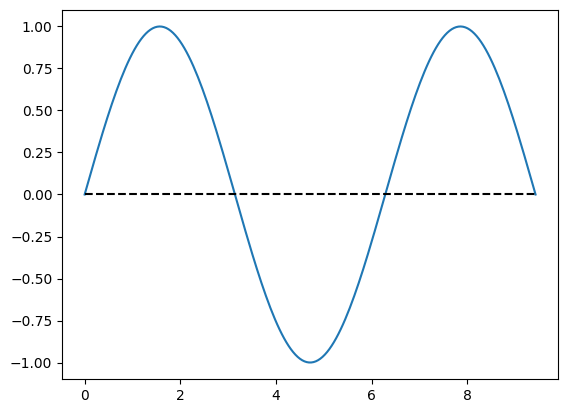

In [ ]:
bs = np.linspace(0, 3*np.pi, 200)
plt.plot(bs, np.sin(bs))
plt.plot([0, 3*np.pi], [0, 0], 'k--')

Hence, a solution,

$G = \cos( \frac{n \pi}{W} x )$

for $n = 0, 1, 2, 3, \ldots$



Also,

* $-b^2 \cos(b x) = \frac{\lambda + k}{f} \cos(b x)$

* $b = \pm \sqrt{-\frac{\lambda + k}{f}}$

That is,

\begin{align}
-\frac{\lambda + k}{f} &= \left(\frac{n \pi}{W}\right)^2
\\
\lambda &= - f \left(\frac{n \pi}{W}\right)^2 - k
\end{align}

This means,

* $F = e^{\lambda t} = e^{- (f \left( \frac{n \pi}{W} \right)^2 + k) t}$

* $G = \cos ( \frac{n \pi}{W} x )$

for $n = 0, 1, 2, 3, \ldots$

#### The complete solution

$$c(t, x) = \sum_{n=0}^\infty A_n \cos(\frac{n \pi}{W} x) e^{- (f \left( \frac{n \pi}{W} \right)^2 + k) t}$$

Let's consider the initial condition

$c(0, x) = q(x) = \sum_{n=0}^\infty A_n \cos( \frac{n \pi}{W} x)$

* $A_0 = \int_0^W q(x) dx$

* $A_k = 2 \int_0^W q(x) \cos(\frac{k \pi}{W} x) dx$

> \begin{align}
\int_0^W q(x) \cos(\frac{k \pi}{W} x) dx
& = \int_0^W \left( \sum_{n=0}^\infty A_n \cos( \frac{n \pi}{W} x) \right) \cos( \frac{k \pi}{W} x) dx
\\
&= \sum_{n=0}^\infty A_n \int_0^W \left(\cos(\frac{n \pi}{W} x) \cos(\frac{k \pi}{W} x) \right) dx
\\
&=
\sum_{n=0}^\infty A_n \int_0^W \frac{\cos( (n-k) \frac{\pi}{W} x) + \cos( (n+k) \frac{\pi}{W} x)}{2} dx
\\
&= \cdots  
+ A_k \int_0^W \frac{\cos(0) + \cos( (2k) \frac{\pi}{W} x)}{2} dx + \cdots
\\
&= \cdots + A_{k-1} (0 + 0)
+ A_k (\frac{1}{2} + 0) + A_{k+1} (0 + 0) + \cdots
\\
&= \frac{A_k}{2}
\end{align}
> Hence, $A_k = 2 \int_0^W q(x) \cos( \frac{k \pi}{W} x) dx$

> Recall
> * $\int_0^\pi \cos(\theta) d \theta = 0$
> * $\int_0^1 \cos(\pi x) d x = 0$

### Code ```Morphogen1D```

$$c(t, x) = \sum_{n=0}^\infty A_n \cos(\frac{n \pi}{W} x) e^{- (f \left( \frac{n \pi}{W} \right)^2 + k) t}$$

In [67]:
def Morphogen1D(t, x, W, f, k, An):
    '''
    t: time                ; (K,)
    x: location            ; (M,)
    W: tissue edge         ; float
    f: diffusion factor    ; float
    k: degradation rate    ; float
    An: coefficients, per initial condition
      * np.array (N,) # i.e., A0, A1, A2, ..., A(N-1)

    return c(t, x)         ; (K,M)
    '''

    ts = t.reshape((-1,1))                                  # K x 1
    xs = x.reshape((-1,1))                                  # M x 1
    An = An.reshape((-1,1))
    N, _ = An.shape                                         # N x 1
    nvec = np.arange(0, N).reshape((-1,1))                  # N x 1

    fpi2 = f*np.pi**2 / W**2
    n2t  = np.dot(nvec**2, ts.T)                             # N x K
    kt   = k * ts                                           # K x 1
    at   = fpi2 * n2t + kt.T                                # N x K
    st = np.exp(-at)                                        # N x K

    sx = np.cos(np.pi/W * np.dot(nvec,xs.T))                # N x M
    c  = An * sx                                            # N x M
    ctx = np.dot(st.T, c)                                   # K x M

    return ctx

#### Test 1

Bicoid in Drosophila (Wartlick et al 2009)
* $f \approx 0.3 \mu m^2/s$
* $k \approx 3e-5 /s$ (computed)
* Patterning is determined < 2 h
* Steady-state ~ 9 h

In [68]:
def q(x):
    return 1.2 + 4*np.cos(3*np.pi*x)

An = np.array([1.2, 0, 0, 4, 0])

W = 10e4 #[um] = 10 cm (10e-2 = 10e4 * 1e-6)

ts = np.linspace(0, 10*3600, 500)
xs = np.linspace(0, W, 50)

ctx = Morphogen1D(ts, xs, W, 0.3, 3e-5, An)

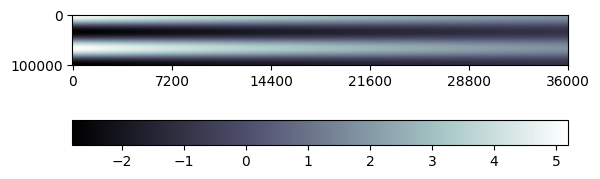

In [69]:
s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")


K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


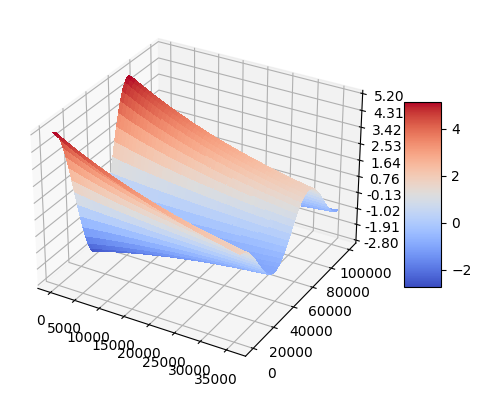

In [70]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xv, yv = np.meshgrid(ts, xs)
X = xv
Y = yv
Z = ctx.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(Z), np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'U[:,-1]')

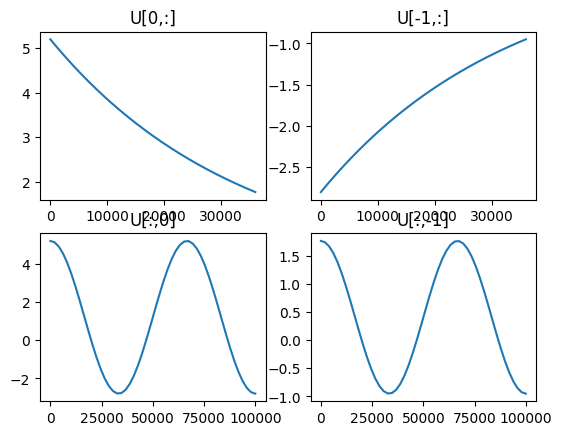

In [71]:
# Check boundary

plt.subplot(2,2,1)
plt.plot(ts, ctx.T[0, :])
plt.title('U[0,:]')

plt.subplot(2,2,2)
plt.plot(ts, ctx.T[-1, :])
plt.title('U[-1,:]')

plt.subplot(2,2,3)
plt.plot(xs, ctx.T[:, 0])
plt.title('U[:,0]')

plt.subplot(2,2,4)
plt.plot(xs, ctx.T[:, -1])
plt.title('U[:,-1]')

Notice
* At left edge, as time goes by the concentration decreases.
  High concentration decreases.
* At right edge, concentration increases.
  Low concentration increases. Make sense.

* At initial time (lower left plot) and the ~steady state (lower right plot),
the plots look similar but the amplitudes decrease.
  Note that there is negative concentration, which is not quite realistic.

### Code ```Morphogen1DCoeff```

* $A_0 = \int_0^W q(x) dx$

* $A_n = 2 \int_0^W q(x) \cos(\frac{n \pi}{W} x) dx$

Approximate with

* $A_0 = \sum_{x=0}^W q(x) \Delta x$

* $A_n = 2 \sum_{x=0}^W q(x) \cos( \frac{n \pi}{W} x) \Delta x$

In [72]:
def Morphogen1DCoeff(q, N, W, dx):
    '''
    Approximate coefficients of the Laplace solution
    q: function with vectorization capability:
       * taking (K x 1) and returning (K x 1)
       * K is a number of x's
    N: the last index of An
    W: the boundary of x
    dx: step size

    return An: np.array shape (1+N,) ; A0, A1, A2, ..., AN
    '''

    xs = np.linspace(0, W, int(1/dx) + 1).reshape((-1,1))   # M x 1
    nvec = np.arange(0, N+1).reshape((-1,1))                # N1 x 1

    qx = q(xs).reshape((-1,1))                              # M x 1

    Sel = np.cos(np.pi/W * np.dot(nvec, xs.T)) * dx         # N1 x M

    An = 2 * np.dot(Sel, qx)                                # N1 x 1
    An[0] = An[0]/2

    return An.reshape((-1,))

In [73]:
W = 10e4

def q(x):
    return 1.2 + 4*np.cos(3*np.pi/W *x)

An = Morphogen1DCoeff(q, 6, W, dx=0.001)
An

array([1.2012e+00, 8.0000e-03, 2.4000e-03, 4.0080e+00, 2.4000e-03,
       8.0000e-03, 2.4000e-03])

#### Test 2

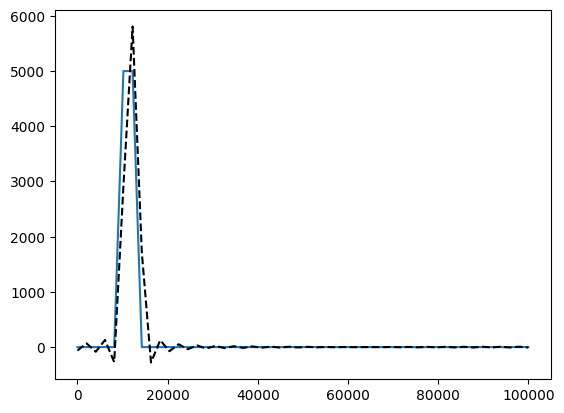

In [74]:
W = 10e4

def q(x):
    x0 = 1.2e4
    c0 = 5000

    eps = 2000

    return (np.abs(x - x0) <= eps)*c0

N = 50
An = Morphogen1DCoeff(q, N, W, dx=0.001)

xs = np.linspace(0, W, 50)

c0x = Morphogen1D(np.array([0]), xs, W, 0.3, 3e-5, An)

plt.plot(xs, q(xs))
plt.plot(xs, c0x[0,:], 'k--')

In [75]:
ts = np.linspace(0, 10*3600, 500)
xs = np.linspace(0, W, 50)

ctx = Morphogen1D(ts, xs, W, 0.3, 3e-5, An)

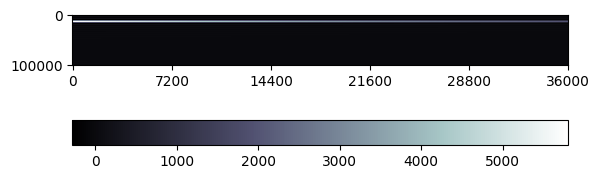

In [76]:
s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")


K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


#### Test 3

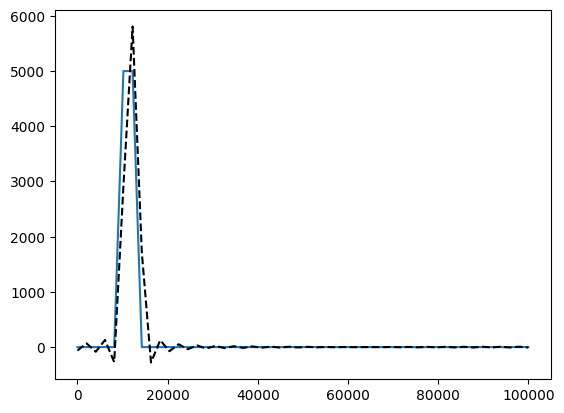

In [77]:
W = 10e4

def q(x):
    x0 = 1.2e4
    c0 = 5000

    eps = 2000

    return (np.abs(x - x0) <= eps)*c0

N = 50
An = Morphogen1DCoeff(q, N, W, dx=0.001)

xs = np.linspace(0, W, 50)

f = 0.99
k = 3e-5

c0x = Morphogen1D(np.array([0]), xs, W, f, k, An)

plt.plot(xs, q(xs))
plt.plot(xs, c0x[0,:], 'k--')

ts = np.linspace(0, 10*3600, 500)
xs = np.linspace(0, W, 50)

ctx = Morphogen1D(ts, xs, W, f, k, An)

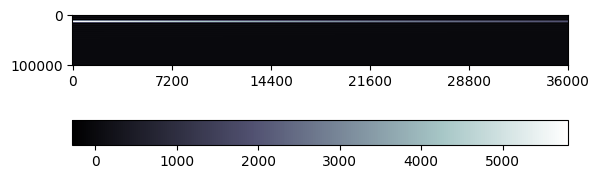

In [78]:
s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


Text(0.5, 1.0, 'U[:,-1]')

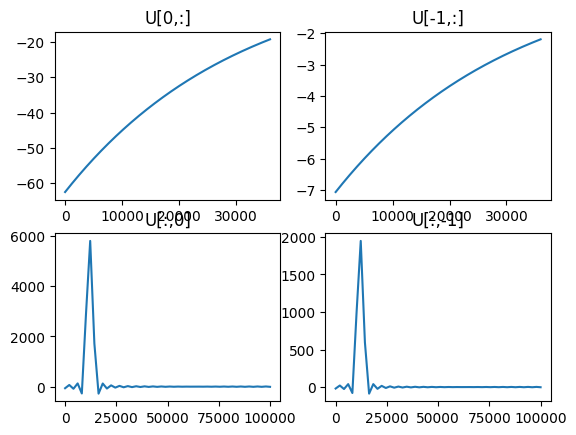

In [79]:
# Check boundary

plt.subplot(2,2,1)
plt.plot(ts, ctx.T[0, :])
plt.title('U[0,:]')

plt.subplot(2,2,2)
plt.plot(ts, ctx.T[-1, :])
plt.title('U[-1,:]')

plt.subplot(2,2,3)
plt.plot(xs, ctx.T[:, 0])
plt.title('U[:,0]')

plt.subplot(2,2,4)
plt.plot(xs, ctx.T[:, -1])
plt.title('U[:,-1]')

#### Test 4

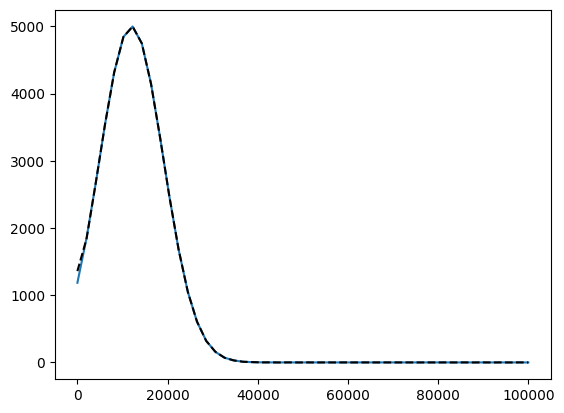

In [80]:
W = 10e4

def q(x):
    x0 = 1.2e4
    c0 = 5000
    s  = 1e-8

    v = c0*np.exp(- s*(x - x0)**2 )
    return v

N = 50
An = Morphogen1DCoeff(q, N, W, dx=0.001)

xs = np.linspace(0, W, 50)

f = 0.99
k = 3e-5

c0x = Morphogen1D(np.array([0]), xs, W, f, k, An)

plt.plot(xs, q(xs))
plt.plot(xs, c0x[0,:], 'k--')

ts = np.linspace(0, 10*3600, 500)
xs = np.linspace(0, W, 50)

ctx = Morphogen1D(ts, xs, W, f, k, An)

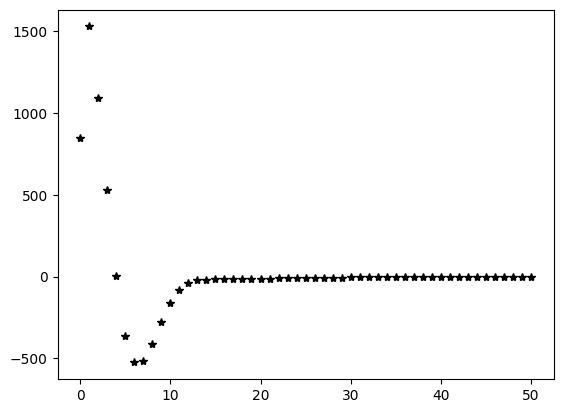

In [84]:
plt.plot(An, 'k*')

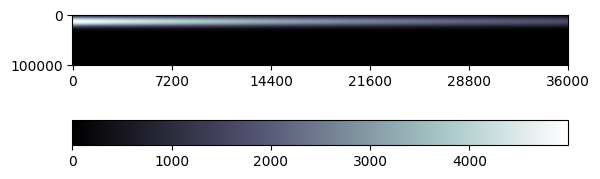

In [85]:
s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


Notice that it does not spread as quick as I was expecting.

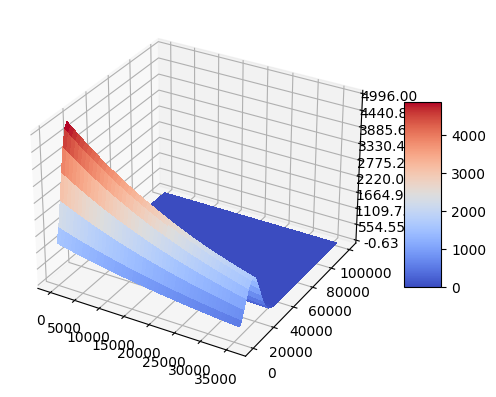

In [86]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xv, yv = np.meshgrid(ts, xs)
X = xv
Y = yv
Z = ctx.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(Z), np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'U[:,-1]')

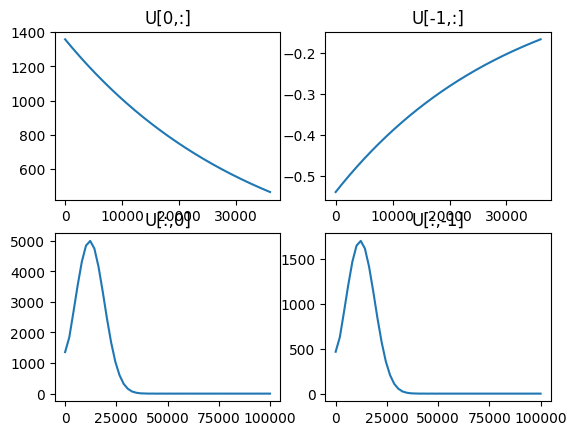

In [87]:
# Check boundary

plt.subplot(2,2,1)
plt.plot(ts, ctx.T[0, :])
plt.title('U[0,:]')

plt.subplot(2,2,2)
plt.plot(ts, ctx.T[-1, :])
plt.title('U[-1,:]')

plt.subplot(2,2,3)
plt.plot(xs, ctx.T[:, 0])
plt.title('U[:,0]')

plt.subplot(2,2,4)
plt.plot(xs, ctx.T[:, -1])
plt.title('U[:,-1]')

In [88]:
ctx.shape

(500, 50)

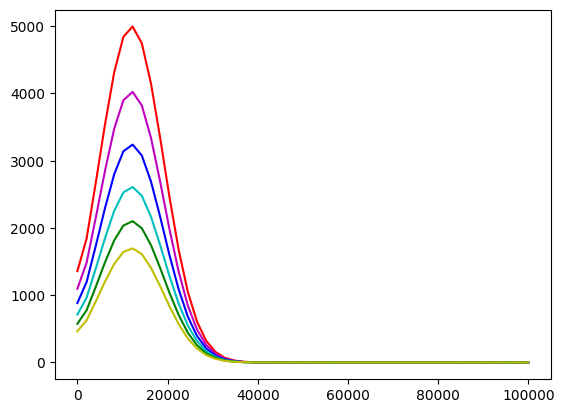

In [89]:
plt.plot(xs, ctx.T[:, 0], 'r')
plt.plot(xs, ctx.T[:, 100], 'm')
plt.plot(xs, ctx.T[:, 200], 'b')
plt.plot(xs, ctx.T[:, 300], 'c')
plt.plot(xs, ctx.T[:, 400], 'g')
plt.plot(xs, ctx.T[:, -1], 'y')



The peak seems smaller.
The plain should be higher, but its change may be too small to be noticed.

Let's zoom in.

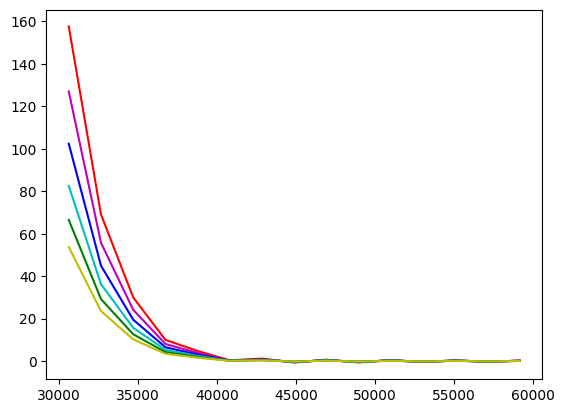

In [90]:
i = 15
j = 30

plt.plot(xs[i:j], ctx.T[i:j, 0], 'r')
plt.plot(xs[i:j], ctx.T[i:j, 100], 'm')
plt.plot(xs[i:j], ctx.T[i:j, 200], 'b')
plt.plot(xs[i:j], ctx.T[i:j, 300], 'c')
plt.plot(xs[i:j], ctx.T[i:j, 400], 'g')
plt.plot(xs[i:j], ctx.T[i:j, -1], 'y')


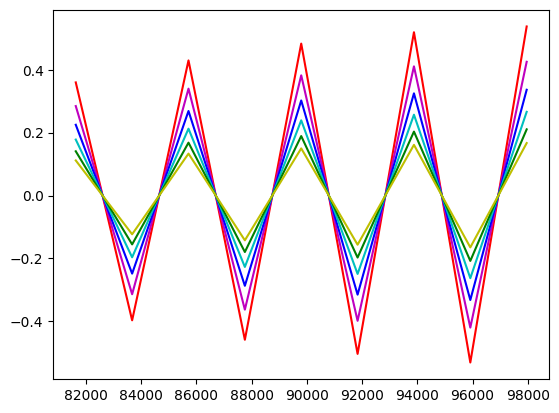

In [91]:
i = 40
j = -1

plt.plot(xs[i:j], ctx.T[i:j, 0], 'r')
plt.plot(xs[i:j], ctx.T[i:j, 100], 'm')
plt.plot(xs[i:j], ctx.T[i:j, 200], 'b')
plt.plot(xs[i:j], ctx.T[i:j, 300], 'c')
plt.plot(xs[i:j], ctx.T[i:j, 400], 'g')
plt.plot(xs[i:j], ctx.T[i:j, -1], 'y')


1. Oscillation is just too large to see the increment of the plain.
2. The plain might not even get higher, since there is a degradation rate.

#### Test 5 : k=0

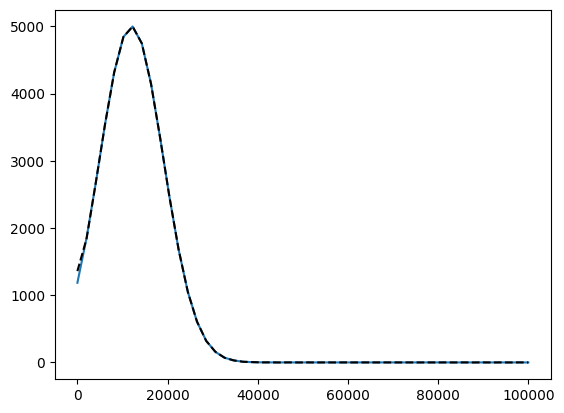

In [92]:
W = 10e4

def q(x):
    x0 = 1.2e4
    c0 = 5000
    s  = 1e-8

    v = c0*np.exp(- s*(x - x0)**2 )
    return v

N = 50
An = Morphogen1DCoeff(q, N, W, dx=0.001)

xs = np.linspace(0, W, 50)

f = 0.99
k = 0

c0x = Morphogen1D(np.array([0]), xs, W, f, k, An)

plt.plot(xs, q(xs))
plt.plot(xs, c0x[0,:], 'k--')

ts = np.linspace(0, 10*3600, 500)
xs = np.linspace(0, W, 50)

ctx = Morphogen1D(ts, xs, W, f, k, An)

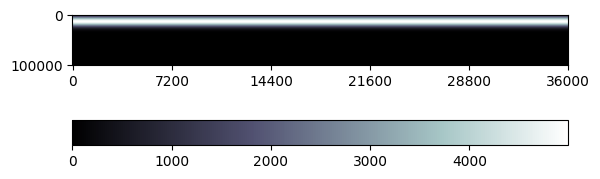

In [93]:
s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


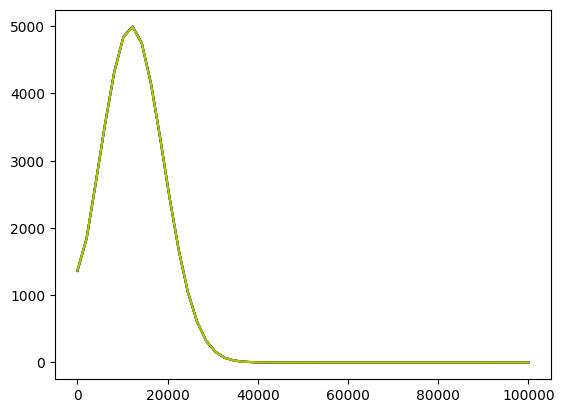

In [94]:
plt.plot(xs, ctx.T[:, 0], 'r')
plt.plot(xs, ctx.T[:, 100], 'm')
plt.plot(xs, ctx.T[:, 200], 'b')
plt.plot(xs, ctx.T[:, 300], 'c')
plt.plot(xs, ctx.T[:, 400], 'g')
plt.plot(xs, ctx.T[:, -1], 'y')

Without degradation, they do not change over time!!!

Why?
  * Why does the diffusion has no effect?

#### Test 6 : large f ; k = 0

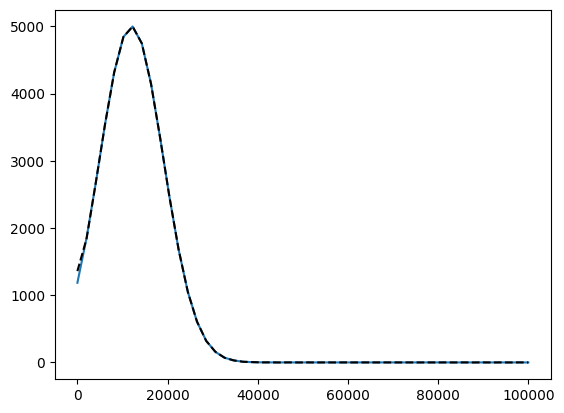

In [104]:
W = 10e4

def q(x):
    x0 = 1.2e4
    c0 = 5000
    s  = 1e-8

    v = c0*np.exp(- s*(x - x0)**2 )
    return v

N = 50
An = Morphogen1DCoeff(q, N, W, dx=0.001)

xs = np.linspace(0, W, 50)

f = 1e4
k = 0

c0x = Morphogen1D(np.array([0]), xs, W, f, k, An)

plt.plot(xs, q(xs))
plt.plot(xs, c0x[0,:], 'k--')

ts = np.linspace(0, 10*3600, 500)
xs = np.linspace(0, W, 50)

ctx = Morphogen1D(ts, xs, W, f, k, An)

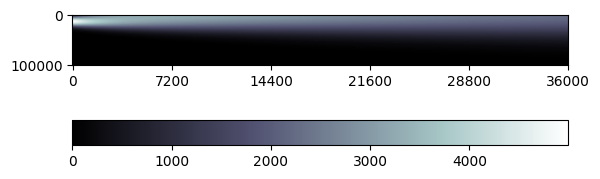

In [105]:
s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


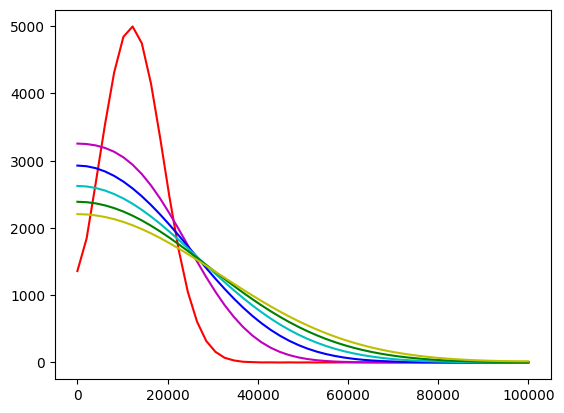

In [106]:
plt.plot(xs, ctx.T[:, 0], 'r')
plt.plot(xs, ctx.T[:, 100], 'm')
plt.plot(xs, ctx.T[:, 200], 'b')
plt.plot(xs, ctx.T[:, 300], 'c')
plt.plot(xs, ctx.T[:, 400], 'g')
plt.plot(xs, ctx.T[:, -1], 'y')

With large diffusion, the morphogen can propagate.

# Morphogen 2D

$$\frac{\partial c}{\partial t} = f_x \frac{\partial^2 c}{\partial x^2} + f_y \frac{\partial^2 c}{\partial y^2} - k c$$

* $c$ concentration at location $x$ at time $t$ [molecule/$\mu m^3$]
* $f_x$ diffusion factor [$\mu m^2/s$] along x-axis
* $f_y$ diffusion factor [$\mu m^2/s$] along y-axis
* $k$ effective degradation rate [$1/s$]

### Boundary and initial conditions

Reflective boundary conditions
* $\frac{\partial c}{\partial x}(t,0) = 0$
* $\frac{\partial c}{\partial x}(t,W) = 0$
* $\frac{\partial c}{\partial y}(t,0) = 0$
* $\frac{\partial c}{\partial y}(t,L) = 0$

Initial condition
* $c(0, x, y) = q(x,y)$

Key steps

* $c(t, x, y) = F(t) \cdot G(x) \cdot H(y)$

* $\frac{\dot{F}}{F} = f_x \frac{\dot{G}}{G} + f_y \frac{\dot{H}}{H} - k = \lambda$

  where $\lambda$ is a constant.

* $\dot{F} = \lambda F$

  * $F = e^{\lambda t}$



* $f_x \frac{\dot{G}}{G} + f_y \frac{\dot{H}}{H} = \lambda + k$

  $f_x \frac{\dot{G}}{G} = \lambda + k - f_y \frac{\dot{H}}{H} = \gamma$

  where $\gamma$ is another constant.

* $f_x \ddot{G} = \gamma G$

  * $G = \cos( b x )$

    where $b = \pm \sqrt{- \frac{\gamma}{f_x}}$

* With boundary conditions:
  * $\dot{G}(0) = 0$
  * $\dot{G}(W) = 0$

  * $G = \cos( n \frac{\pi}{W} x )$

    for $n = 0, 1, 2, 3, \ldots$

    * $b = n \frac{\pi}{W}$

      * $b = \pm \sqrt{- \frac{\gamma}{f_x}} = n \frac{\pi}{W}$

        * $\gamma = - f_x \left(n \frac{\pi}{W} \right)^2$

* $f_y \ddot{H} = \frac{\lambda + k - \gamma}{f_y} H$

  * $H = \cos( c y )$

    where $c = \pm \sqrt{- \frac{- f_x (n \pi / W)^2 - \lambda - k}{f_y}}$

* With boundary conditions:
  * $\dot{H}(0) = 0$
  * $\dot{H}(L) = 0$

  * $H = \cos( m \frac{\pi}{L} x )$

    for $m = 0, 1, 2, 3, \ldots$

    * $c = m \frac{\pi}{L}$

      * $\lambda = -f_x (n \pi / W)^2 - f_y (m \pi / L)^2 - k$

A solution

$c(t, x, y) = e^{- (f_x (n \pi / W)^2 + f_y (m \pi / L)^2 + k) t} \cos(\frac{n \pi}{W} x) \cos(\frac{m \pi}{L} y) $

Therefore,

$c(t, x, y) = \sum_{n=0}^\infty \sum_{m=0}^\infty A_{nm} e^{- (f_x (n \pi / W)^2 + f_y (m \pi / L)^2 + k) t} \cos(\frac{n \pi}{W} x) \cos(\frac{m \pi}{L} y) $

With initial condition:

$c(0, x, y) = q(x, y) = \sum_{n=0}^\infty \sum_{m=0}^\infty A_{nm} \cos(\frac{n \pi}{W} x) \cos(\frac{m \pi}{L} y)$

we can derive

* $A_{00} = \int_0^W \int_0^L q(x, y) dx dy$

* $A_{0j} = 2 \int_0^W \int_0^L q(x, y) \cos(\frac{j \pi}{L} y) dx dy$

  for $j > 0$

* $A_{i0} = 2 \int_0^W \int_0^L q(x, y) \cos(\frac{i \pi}{W} x) dx dy$

  for $i > 0$

* $A_{ij} = 4 \int_0^W \int_0^L q(x, y) \cos(\frac{i \pi}{W} x) \cos(\frac{j \pi}{L} y) dx dy$

  for $i > 0$ and $j > 0$.



## Code ```morphogen2D```

$c(t, x, y) = \sum_{n=0}^\infty \sum_{m=0}^\infty A_{nm} e^{- (f_x (n \pi / W)^2 + f_y (m \pi / L)^2 + k) t} \cos(\frac{n \pi}{W} x) \cos(\frac{m \pi}{L} y) $

In [107]:
def Morphogen2D(t, x, y, W, L, fx, fy, k, An):
    '''
    t: time                ; float
    x: location            ; float
    y: location            ; float
    W: tissue edge         ; float
    L: tissue edge         ; float
    fx: diffusion factor   ; float
    fy: diffusion factor   ; float
    k: degradation rate    ; float
    Anm: coefficients, per initial condition
      * np.array (N,M) # i.e.,
        A00, A01, A02, ..., A(0,M-1)
        :               :       :
        A(N-1,0),  ...    , A(N-1,M-1)

    return c(t, x, y)       ; float
    '''

    N, M = An.shape                                         # N x M
    nvec = np.arange(0, N).reshape((-1,1))                  # N x 1
    mvec = np.arange(0, M).reshape((-1,1))                  # M x 1

    sx = np.cos(np.pi/W * np.dot(nvec, x))                  # N x 1
    sy = np.cos(np.pi/L * np.dot(mvec, y))                  # M x 1

    piW2 = (np.pi/W)**2
    piL2 = (np.pi/L)**2

    p1 = fx * (piW2 * nvec**2)                              # N x 1
    p2 = fy * (piL2 * mvec**2)                              # M x 1

    pall = p1 + p2.T + k                                    # N x M
    eTerm = np.exp(-1*pall*t)                               # N x M

    Aexp = np.multiply(Anm, eTerm)                          # N x M

    C0 = sx.T @ Aexp                                        # 1 x M
    C  = C0 @ sy                                            # 1 x 1

    return C[0,0]

### Test

In [109]:
W = 10e4
L = 10e4

def q(x, y):

    v = 3 * np.cos(np.pi*x/W) * np.cos(2*np.pi*y/L)
    return v

N = 50
Anm = np.array([[0, 0, 0, 0],
                [0, 0, 3, 0]])

xs = np.linspace(0, W, 50)
ys = np.linspace(0, L, 50)

fx = 1e4
fy = 1.2e4

k = 0

C = np.zeros((50, 50))

for i, x in enumerate(xs):
    for j, y in enumerate(ys):

        C[i,j] = Morphogen2D(0, x, y, W, L, fx, fy, k, Anm)



Q = np.zeros((50,50))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        Q[i,j] = q(x,y)


Text(0.5, 1.0, 'q(x,y)')

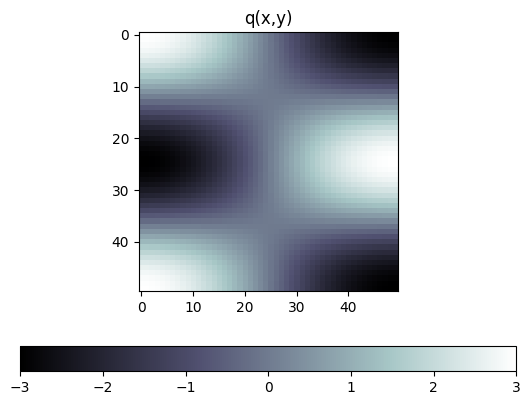

In [110]:
s= plt.imshow(Q.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")
plt.title('q(x,y)')


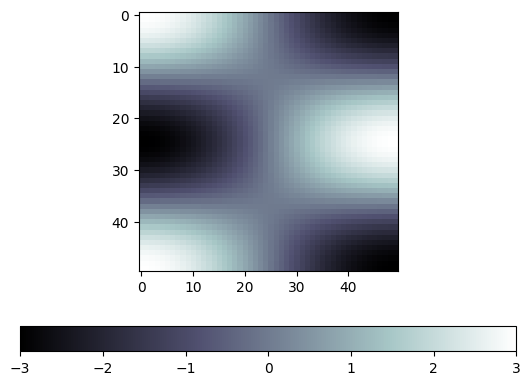

In [111]:
s= plt.imshow(C.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")


## Code ```morphogen2DCoeff```

* $A_{00} = \int_0^W \int_0^L q(x, y) dx dy$

* $A_{0j} = 2 \int_0^W \int_0^L q(x, y) \cos(\frac{j \pi}{L} y) dx dy$

* $A_{i0} = 2 \int_0^W \int_0^L q(x, y) \cos(\frac{i \pi}{W} x) dx dy$

* $A_{ij} = 4 \int_0^W \int_0^L q(x, y) \cos(\frac{i \pi}{W} x) \cos(\frac{j \pi}{L} y) dx dy$

Discretize

* $A_{00} = \sum_{x=0}^W \sum_{y=0}^L q(x, y) \Delta x \Delta y$

* $A_{0j} = 2 \sum_{x=0}^W \sum_{y=0}^L q(x, y) \cos(\frac{j \pi}{L} y) \Delta x \Delta y$

* $A_{i0} = 2 \sum_{x=0}^W \sum_{y=0}^L q(x, y) \cos(\frac{i \pi}{W} x) \Delta x \Delta y$

* $A_{ij} = 4 \sum_{x=0}^W \sum_{y=0}^L q(x, y) \cos(\frac{i \pi}{W} x) \cos(\frac{j \pi}{L} y) \Delta x \Delta y$

In [ ]:
def Morphogen2DCoeff(q, N, M, W, L, dx, dy):
    '''
    Approximate coefficients of the 2D morphogen solution
    q: function with vectorization capability:
       * taking (Q x R) and returning (Q x R)
       * Q is a number of x's
       * R is a number of y's
    N, M : final dimension of the Anm [N x M]
    W: the boundary of x
    L: the boundary of y
    dx: step size
    dy: step size

    return Anm: np.array shape (N,M)
    '''

    xs = np.linspace(0, W, int(1/dx) + 1).reshape((-1,1))   # Q x 1
    ys = np.linspace(0, L, int(1/dy) + 1).reshape((-1,1))   # R x 1

    Q, _ = xs.shape
    R, _ = ys.shape

    nvec = np.arange(0, N).reshape((-1,1))                  # N x 1
    mvec = np.arange(0, M).reshape((-1,1))                  # M x 1

    qxy = np.zeros((Q,R))                                   # Q x R

    sx =  np.cos(np.pi/W * np.dot(nvec, xs.T)) * dx         # N x Q
    sy =  np.cos(np.pi/L * np.dot(mvec, ys.T)) * dx         # M x R


    # STOP HERE!!! I'm tired.

    # I don't think I really need this!! See #Morphotron 5

#### Test

# Standard boundary and initial conditions

per Wartlick et al 2009.

Organizing center is at $x = 0$
* $f \frac{\partial c}{\partial x}(t,0) = -j_0$

Reflective boundary conditions
* $\frac{\partial c}{\partial x}(t,W) = 0$

Initial condition
* $c(0, x) = 0$

(No concentration, before the source's secretion.)

$$\frac{\partial c}{\partial t} = f \frac{\partial^2 c}{\partial x^2} - k c$$


## Separation of variables

Key derivation steps

1. $c(t, x) = F(t) G(x)$

2. $\frac{\dot{F}}{F} = f\frac{\ddot{G}}{G} -k = \beta$

   where $\beta$ is a constant matching LHS and RHS.

3. $F(t) = e^{\beta t}$

4. $\ddot{G} = \frac{\beta + k}{f} G$

   The pattern of $G(x)$ is considered based on the boundary conditions.

Boundary conditions

* $f \frac{\partial c}{\partial x}(t,0) = -j_0$

  $\Rightarrow F(t) \cdot \dot{G}(0) = -\frac{-j_0}{f}$


This boundary condition makes our separation of variables unsuitable.

Apparently, it is either
* that $F(t)$ is a constant
* or that $\dot{G}(0)$ has to have function of $t$ to cancel out the $F(t)$

This means that **the separation of variables** may **not** be suitable for this problem.

## Steady-state solution

Let start with easier case, the steady state.

$$0 = f \frac{d^2 u}{d x^2} - k u$$

for $u(x) = c(t, x)$ at $t \rightarrow$ steady state.

With

* $f \frac{\partial c}{\partial x}(t,0) = -j_0$

  $\Rightarrow f \frac{d u}{d x}(0) = -j_0$

* $\frac{\partial c}{\partial x}(t,W) = 0$

  $\Rightarrow \frac{d u}{d x}(W) = 0$

Let's try

* $u(x) = e^{a x}$

* $\dot{u}(x) = a e^{a x}$

* $\ddot{u}(x) = a^2 e^{a x}$

Hence,

\begin{align}
f \frac{d^2 u}{d x^2} - k u &= 0
\\
(f a^2 - k) e^{a x} &= 0
\\
f a^2 - k & = 0
\end{align}

That is,

$a = \pm \sqrt{\frac{k}{f}}$

The solution will be in the form:

$$u(x) = A_1 e^{\sqrt{\frac{k}{f}} x} + A_2 e^{- \sqrt{\frac{k}{f}} x}$$

and

$$\dot{u}(x) = A_1 \sqrt{\frac{k}{f}} e^{\sqrt{\frac{k}{f}} x} - A_2 \sqrt{\frac{k}{f}} e^{- \sqrt{\frac{k}{f}} x}$$

Let define $\lambda \equiv \sqrt{\frac{f}{k}}$

(Wartlick et al 2009 use $D$ for $f$)


$$u(x) = A_1 e^{ \frac{x}{\lambda} } + A_2 e^{- \frac{x}{\lambda}}$$

and

$$f \dot{u}(x) = \frac{f}{\lambda} \left( A_1  e^{ \frac{x}{\lambda} } - A_2 e^{- \frac{x}{\lambda}} \right)$$

At $x = 0$

*  $f \dot{u}(0) = \frac{f}{\lambda} \left( A_1 - A_2 \right) = -j_0$

At $x = W$

  * $f \dot{u}(W) = \frac{f}{\lambda} \left( A_1  e^{ \frac{W}{\lambda} } - A_2 e^{- \frac{W}{\lambda}} \right) = 0$
    
    Hence, $A_1  e^{ \frac{W}{\lambda} } - A_2 e^{- \frac{W}{\lambda}} = 0$

    or $A_1 = A_2 e^{-\frac{2 W}{\lambda}}$

Thus,

$\frac{f}{\lambda} \left( A_2 e^{-\frac{2 W}{\lambda}} - A_2 \right) = -j_0$

then

$A_2 = \frac{j_0 \lambda}{f} \left( \frac{1}{1 - e^{-\frac{2 W}{\lambda}}} \right)$

and

$A_1 = \frac{j_0 \lambda}{f} \left( \frac{e^{-\frac{2 W}{\lambda}}}{1 - e^{-\frac{2 W}{\lambda}}} \right)$

$$u(x) = \frac{j_0 \lambda}{f} \left( \frac{1}{1 - e^{-\frac{2 W}{\lambda}}} \right) \left( e^{-\frac{2 W}{\lambda}} e^{ \frac{x}{\lambda} } +  e^{- \frac{x}{\lambda}} \right)$$

Recall $\lambda = \sqrt{\frac{f}{k}}$

Per Wartlick et al 2009
If $W >> \lambda$, then $e^{-\frac{2 W}{\lambda}} \approx 0$ and

\begin{align}
u(x) &\approx \frac{j_0 \lambda}{f}  e^{- \frac{x}{\lambda}}
\\
&=
\frac{j_0}{\sqrt{f k}}  e^{- \frac{x}{\lambda}}
\end{align}




### Code ```Morphogen```

In [ ]:
def Morphogen(x, f, k, j0):
    '''
    x : location;         um                 [np.array (L,)]
    f : diffusion factor; um^2/s             [float]
    k : degradation rate; 1/s                [float]
    j0: net flux;         molecules/(um^2 s) [float]

    return u(x)
      concentration at location x at steady state; molecule/(um^3) [np.array (L,)]
    '''

    lda = np.sqrt(f/k)
    u = j0/np.sqrt(f * k) * np.exp(-x / lda)

    return u

##### Test 1

Bicoid in Drosophila (Wartlick et al 2009)
* $f \approx 0.3 \mu m^2/s$
* $k \approx$ 3e-5 $/s$ (computed)
* Patterning is determined < 2 h
* Steady-state ~ 9 h

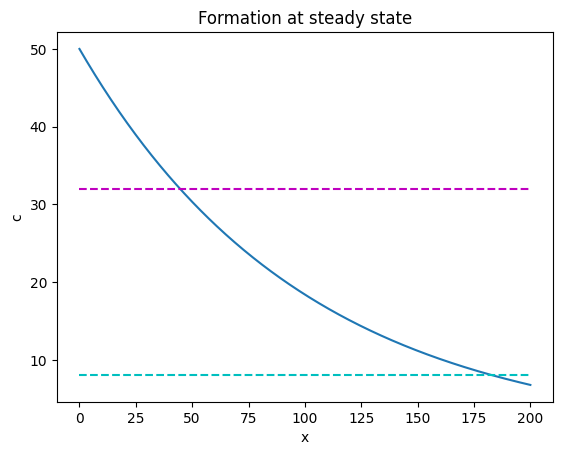

In [ ]:
W = 200
f = 0.3
k = 3e-5
j0 = 0.15

xs = np.linspace(0, W, 500)

cx = Morphogen(xs, f, k, j0)
plt.plot(xs, cx)
plt.title('Formation at steady state')
plt.xlabel('x')
plt.ylabel('c')


c1 = 32
c2 = 8

plt.plot([np.min(xs), np.max(xs)], [c1, c1], 'm--')

plt.plot([np.min(xs), np.max(xs)], [c2, c2], 'c--')


##### Test 2

Replication of Fig 3B, Wartlick et al 2009

! They do not inform the parameter values.
! I use trial-and-error to find these values. I match it visually.

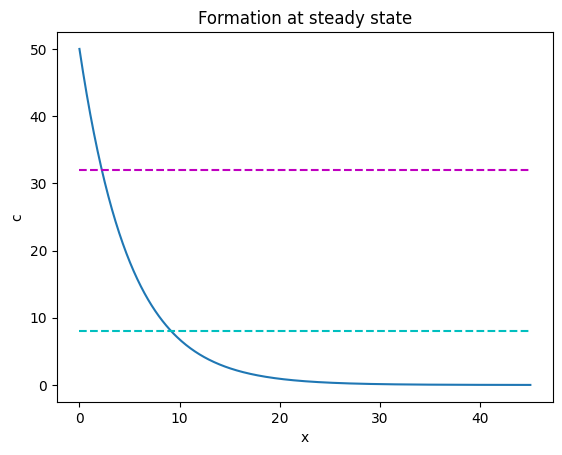

In [ ]:
W = 45
f = 0.005
k = 2e-4
j0 = 0.05

xs = np.linspace(0, W, 500)

cx = Morphogen(xs, f, k, j0)
plt.plot(xs, cx)
plt.title('Formation at steady state')
plt.xlabel('x')
plt.ylabel('c')


c1 = 32
c2 = 8

plt.plot([np.min(xs), np.max(xs)], [c1, c1], 'm--')

plt.plot([np.min(xs), np.max(xs)], [c2, c2], 'c--')


#### Code ```MorphLocation```

* $u(x) = \frac{j_0}{\sqrt{f k}}  e^{- \frac{x}{\lambda}}$

* Let $c_0 \equiv \frac{j_0}{\sqrt{f k}}$

* $u(x) = c_0 e^{- \frac{x}{\lambda}}$

Location $\hat{x}$ of the activation level $\hat{c}$,

\begin{align}
\hat{c} &= c_0 e^{- \frac{\hat{x}}{\lambda}}
\\
\ln \frac{\hat{c}}{c_0} &= - \frac{\hat{x}}{\lambda}
\\
\hat{x} &= -\lambda \ln \frac{\hat{c}}{c_0}
\\
\hat{x} &= \lambda \ln \frac{c_0}{\hat{c}}
\end{align}

In [ ]:
def MorphLocation(ctau, f, k, j0):
    '''
    ctau : threshold of the concentration level
    f : diffusion
    k : degradataion
    j0 : flux

    return x : location corresponding to ctau
    '''

    lda = np.sqrt(f/k)
    c0 = j0/np.sqrt(f*k)

    x = lda * np.log(c0/ctau)

    return x


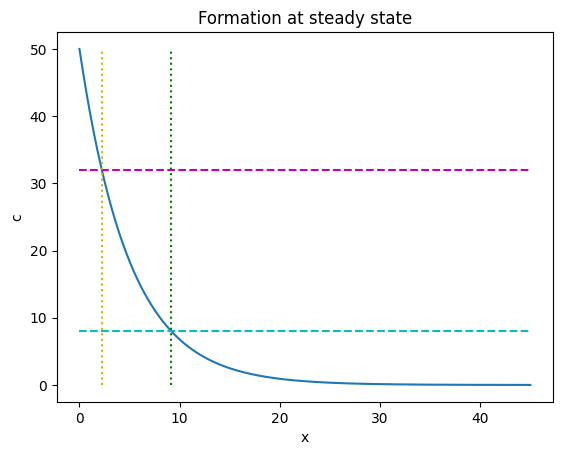

In [ ]:
plt.plot(xs, cx)
plt.title('Formation at steady state')
plt.xlabel('x')
plt.ylabel('c')


c1 = 32
c2 = 8


plt.plot([np.min(xs), np.max(xs)], [c1, c1], 'm--')

x1 = MorphLocation(c1, f, k, j0)
plt.plot([x1, x1], [np.min(cx), np.max(cx)], 'y:')

plt.plot([np.min(xs), np.max(xs)], [c2, c2], 'c--')

x2 = MorphLocation(c2, f, k, j0)
plt.plot([x2, x2], [np.min(cx), np.max(cx)], 'g:')


1. I have worked on the morphogen. I can make it a programming exercise.

2. The patterning seems accentuated.

   It looks very promising for my iDNAM plan.

But,

* I still need to work on the case where the source is not at $x = 0$.

* I need to extend it to 2D.

Let's do the source at $x_0 \neq 0$ first.

### Steady-state with non-origin source

Recall

* The boundary condition $f \frac{d u}{d x}(0) = -j_0$ makes the formation so pronounced.

  C.f. my boundary condtions where this replenishing condition does not present, the gradient pattern does not spread that well.

  * Kill the degradation term may help.

  * But this $f \frac{d u}{d x}(0) = -j_0$ implicitly enforces the replenishment of the morphogen.


* Since $x = 0$ makes the math cleaner, I will keep this but extend the edge of $x$ to negative.

  Another the condition is not at the boundary.

#### Simply, extend the range of x

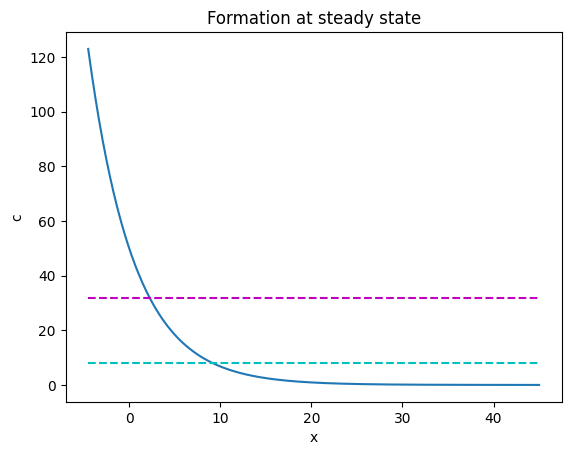

In [ ]:
W = 45
f = 0.005
k = 2e-4
j0 = 0.05

xs = np.linspace(-0.1*W, W, 500)

cx = Morphogen(xs, f, k, j0)
plt.plot(xs, cx)
plt.title('Formation at steady state')
plt.xlabel('x')
plt.ylabel('c')


c1 = 32
c2 = 8

plt.plot([np.min(xs), np.max(xs)], [c1, c1], 'm--')

plt.plot([np.min(xs), np.max(xs)], [c2, c2], 'c--')


The problem is that the concentration will keep getting larger and larger to extremely large.

#### Two flux conditions

* $f \frac{d u}{d x}(0) = -j_0$

* $f \frac{d u}{d x}(-x_0) = j_0$

  and $x_0 > 0$.

This means the source is around $x \in [-x_0, 0]$.

##### Solution

* $u(x) = A_1 e^{ \frac{x}{\lambda} } + A_2 e^{- \frac{x}{\lambda}}$

* $f \dot{u}(x) = \frac{f}{\lambda} \left( A_1  e^{ \frac{x}{\lambda} } - A_2 e^{- \frac{x}{\lambda}} \right)$

At $x = 0$

*  $f \dot{u}(0) = \frac{f}{\lambda} \left( A_1 - A_2 \right) = -j_0$


At $x = -x_0$

* $f \dot{u}(-x_0) = \frac{f}{\lambda} \left( A_1  e^{ -\frac{x_0}{\lambda} } - A_2 e^{\frac{x_0}{\lambda}} \right) = j_0$

Solve these 2 equations for $A_1$ and $A_2$,

* $A_1 = \beta \left( \frac{e^{- \frac{x_0}{\lambda}} + 1}{e^{- \frac{2 x_0}{\lambda}} - 1} \right)$

* $A_2 = \beta \left( \frac{e^{- \frac{x_0}{\lambda}} + 1}{e^{- \frac{2 x_0}{\lambda}} - 1} + 1 \right)$

  where $\beta = j_0 \frac{\lambda}{f}$.
  

##### Code ```MorphDoubleFlux```

In [62]:
def MorphDoubleFlux(x, f, k, j0, x0):
    '''
    x : location;         um                  [np.array (L,)]
    f : diffusion factor; um^2/s              [float]
    k : degradation rate; 1/s                 [float]
    j0: net flux;         molecules/(um^2 s)  [float]
    x0: location of complimentary flux is -x0 [float]

    return u(x)
      concentration at location x at steady state; molecule/(um^3) [np.array (L,)]
    '''

    lda = np.sqrt(f/k)
    beta = j0 * lda/f

    nom = np.exp(-x0/lda) + 1
    denom = np.exp(-2*x0/lda) - 1
    r = nom/denom

    A1 = beta * r
    A2 = beta * (r + 1)


    u = A1 * np.exp(x / lda) + A2 * np.exp(-x / lda)

    return u


###### Test

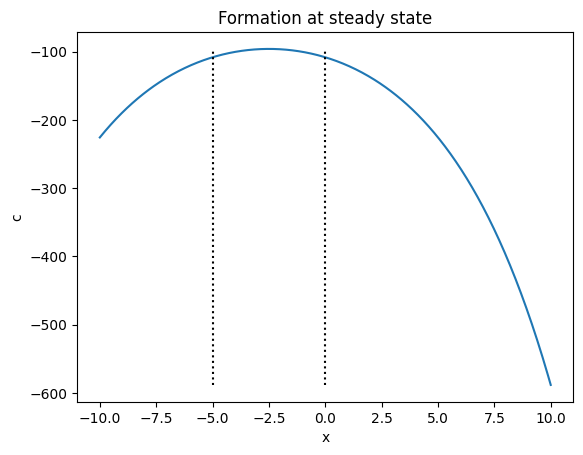

In [66]:
W = 10
f = 0.005
k = 2e-4
j0 = 0.05

x0 = 5

xs = np.linspace(-2*x0, W, 500)

cx = MorphDoubleFlux(xs, f, k, j0, x0)
plt.plot(xs, cx)
plt.title('Formation at steady state')
plt.xlabel('x')
plt.ylabel('c')

plt.plot([0, 0], [np.min(cx), np.max(cx)], 'k:')
plt.plot([-x0, -x0], [np.min(cx), np.max(cx)], 'k:')

* It decreases pretty fast.
  But, it seems ok (at this point).

* It works in a negative concentration region.
  * It matters for modeling real morphogen gradient formation.
  * But, it does not matter for fitting the greater and lesser palates.

##### Analysis of the result from formulation perspective

* $A_1 = \beta \left( \frac{e^{- \frac{x_0}{\lambda}} + 1}{e^{- \frac{2 x_0}{\lambda}} - 1} \right)$

* $A_2 = \beta \left( \frac{e^{- \frac{x_0}{\lambda}} + 1}{e^{- \frac{2 x_0}{\lambda}} - 1} + 1 \right)$

The negative sign must come from $e^{- \frac{2 x_0}{\lambda} } - 1$ term.

* $x_0$ cannot be $0$.
  * Otherwise, we see divided-by-zero.

* Since $x_0 > 0$, then $e^{- \frac{2 x_0}{\lambda}} - 1 < 0$.

Mathematical point of view, I think we need to re-consider the pattern of the pde solution.

* The form of the solution has to better accommodate the constraints.

# Morphogen-inspired model

Morphogen 1D:

$$c(t, x) = \sum_{n=0}^\infty A_n \cos(\frac{n \pi}{W} x) e^{- (f \left( \frac{n \pi}{W} \right)^2 + k) t}$$

## Morphotron 1

Arbitrarily, simplify to

* $c(t, x) = A \cos( \frac{\pi}{W} x ) e^{-b t}$

In [ ]:
def morphron(t, x, A, W, b):
    '''
    t: np.array (K,)
    x: np.array (M,)

    return ctx (K, M)
    '''
    ts = t.reshape((-1,1))       # K x 1
    xs = x.reshape((-1,1))       # M x 1

    sx = np.cos(np.pi/W * xs)    # M x 1
    st = np.exp(-b * ts)         # K x 1

    ctx = A * np.dot(st, sx.T)   # K x M

    return ctx

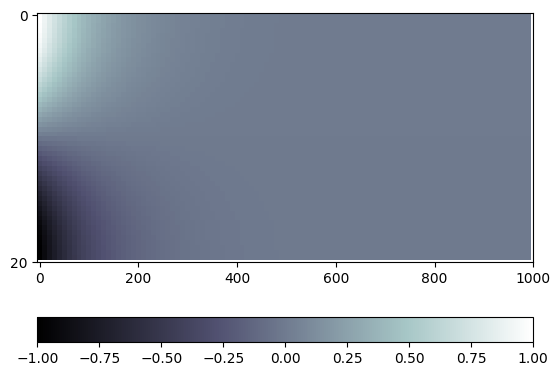

In [ ]:
W = 20
tau = 1000
xs = np.linspace(0, W, 50)
ts = np.linspace(0, tau, 100)

A = 1
b = 1e-2

ctx = morphron(ts, xs, A, W, b)

s= plt.imshow(ctx.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

K, M = ctx.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(ts), np.max(ts), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.yticks([0, M], [labels[1], labels[-1]]);


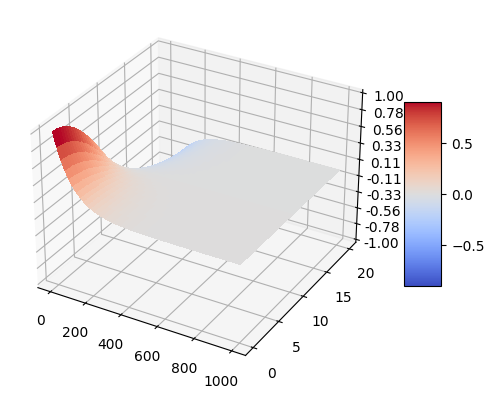

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xv, yv = np.meshgrid(ts, xs)
X = xv
Y = yv
Z = ctx.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(Z), np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Morphotron 2

Arbitrarily, simplify to

* $c(x, y) = A \cos( \frac{2 \pi}{W} x + \pi) \cos(\frac{2 \pi}{H} y + \pi)$

(2D version)

In [ ]:
def Morphotron2(x, y, W, H, A):
    '''
    x: np.array (L,)
    y: np.array (M,)

    return cxy (L, M)
    '''
    xs = x.reshape((-1,1))       # L x 1
    ys = y.reshape((-1,1))       # M x 1

    sx = np.cos(2*np.pi/W * xs + np.pi)    # L x 1
    sy = np.cos(2*np.pi/H * ys + np.pi)    # M x 1

    cxy = A * np.dot(sx, sy.T)   # K x M

    return cxy

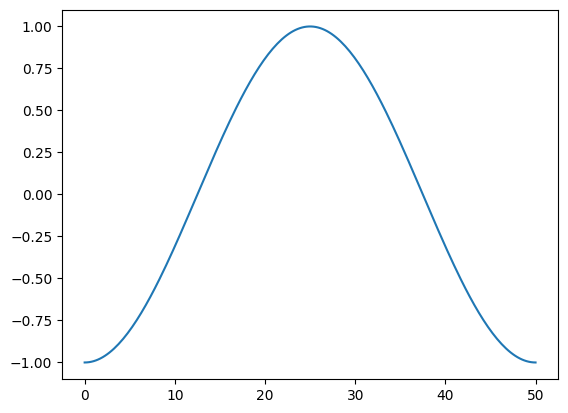

In [ ]:
W = 20
H = 50
xs = np.linspace(0, W, 100)
ys = np.linspace(0, H, 200)

A = 1

c0y = Morphotron2(np.array([W/2]), ys, W, H, A)

plt.plot(ys, c0y[0,:])

In [ ]:
cxy = Morphotron2(xs, ys, W, H, A)


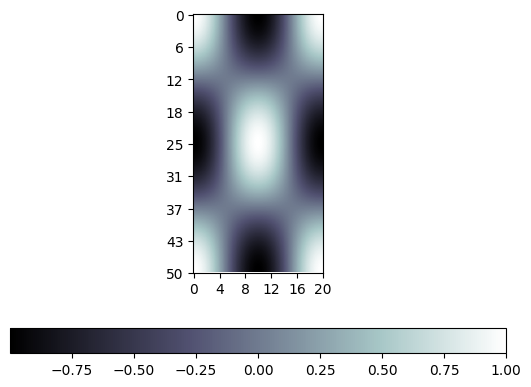

In [ ]:
s= plt.imshow(cxy.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

L, M = cxy.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(ys), np.max(ys), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

# plt.yticks([0, M], [labels[1], labels[-1]]);
plt.yticks(locs[1:], labels[1:]);


## Morphotron 3


* Gaussian

$c(x,y) = k e^{ -a (x-x_0)^2 - b (y - y_0)^2  }$

In [ ]:
def gauss2(x, y, x0, y0, a, b, k):
    '''
    x: np.array (L,)
    y: np.array (M,)

    return cxy (L, M)
    '''
    xs = x.reshape((-1,1))       # L x 1
    ys = y.reshape((-1,1))       # M x 1

    Ex = -a*(xs - x0)**2         # L x 1
    Ey = -b*(ys - y0)**2         # M x 1

    cxy = A * np.exp(Ex + Ey.T)  # L x M
    return cxy

In [ ]:
W = 20
H = 50
xs = np.linspace(0, W, 200)
ys = np.linspace(0, H, 200)

k = 2
a = 1
b = 1.2

s = 1e-2

cxy = gauss2(xs, ys, W/3, H/4, a*s, b*s, k)


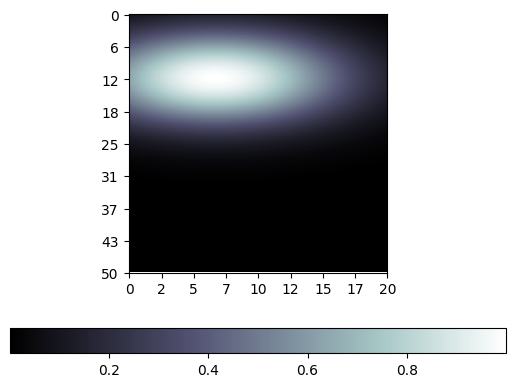

In [ ]:
s= plt.imshow(cxy.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")

L, M = cxy.shape

locs, labels = plt.xticks();
new_text = np.linspace(np.min(xs), np.max(xs), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

plt.xticks(locs[1:], labels[1:]);

locs, labels = plt.yticks();
new_text = np.linspace(np.min(ys), np.max(ys), len(locs) - 1)
for i, t in enumerate(labels):
    if i > 0:
        t.set_text( str(int(new_text[i-1])) );

# plt.yticks([0, M], [labels[1], labels[-1]]);
plt.yticks(locs[1:], labels[1:]);


This gauss model seems very promising, but it can hardly relate to morphogen.

## Morphotron 4

Polar coordinate

$c(r, \theta) = (1 + a \cos(\theta)) e^{-b r}$

Note

* Steady-state morphogen: $c(x) = c_0 e^{-\frac{x}{\lambda}}$

* The coefficient $(1 + a cos(\theta))$ is my arbitrary addition to make it asymmetry.

In [128]:
def morph4(r, t, a, b):

    return (1+ a * np.cos(t) * np.exp(-b * r))

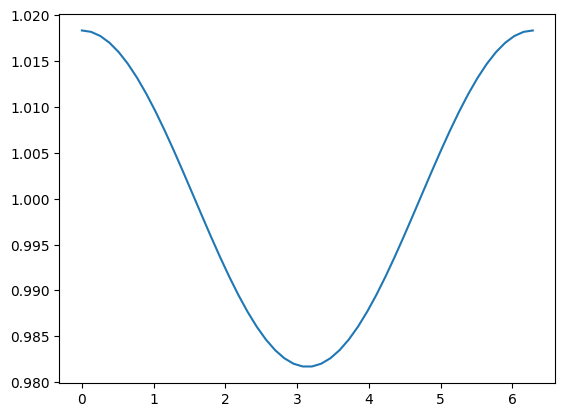

In [129]:
a = 1
b = 1

ts = np.linspace(0, 2*np.pi, 50)
cs = morph4(4, ts, a, b)

plt.plot(ts, cs)

### Code ```pol2rec``` and ```rec2pol```

In [112]:
def pol2rec(r, t):
    x = r*np.cos(t)
    y = r*np.sin(t)

    return x, y

In [122]:
def rec2pol(x, y):
    r = np.sqrt(x**2 + y**2)
    t = np.arctan2(y, x)

    return r,t

In [120]:
pol2rec(5, np.pi/6)

(4.330127018922194, 2.4999999999999996)

In [125]:
np.pi/6

0.5235987755982988

In [126]:
print(rec2pol(4.33, 2.5))
print(rec2pol(-4.33, 2.5))
print(rec2pol(4.33, -2.5))
print(rec2pol(-4.33, -2.5))


(4.999889998789973, 0.5236114777699694)
(4.999889998789973, 2.617981175819824)
(4.999889998789973, -0.5236114777699694)
(4.999889998789973, -2.617981175819824)


In [135]:
a = 1
b = 1

xs = np.linspace(-2, 2, 50)
ys = np.linspace(-2, 2, 50)

C = np.zeros((50, 50))

for i, x in enumerate(xs):
    for j, y in enumerate(ys):

        r, t = rec2pol(x,y)
        C[i,j] = morph4(r, t, a, b)

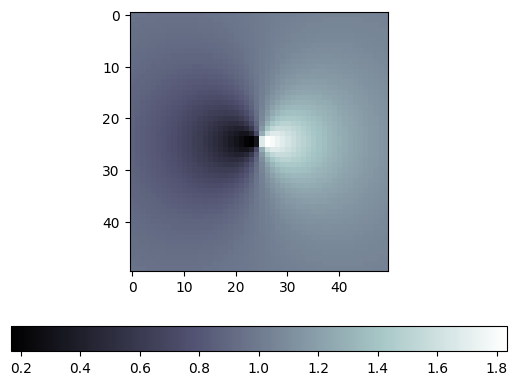

In [136]:
s= plt.imshow(C.T, cmap=plt.cm.bone)
plt.colorbar(s, location="bottom")


<a list of 5 text.Text objects>

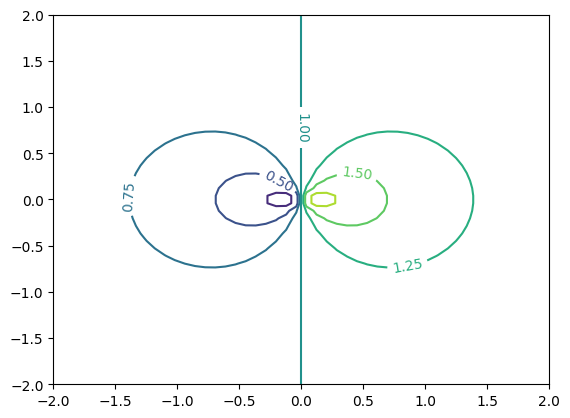

In [142]:
fig, ax = plt.subplots()
CS = ax.contour(xs, ys, C.T)
ax.clabel(CS, inline=True, fontsize=10)


### Explore different parameters

<a list of 4 text.Text objects>

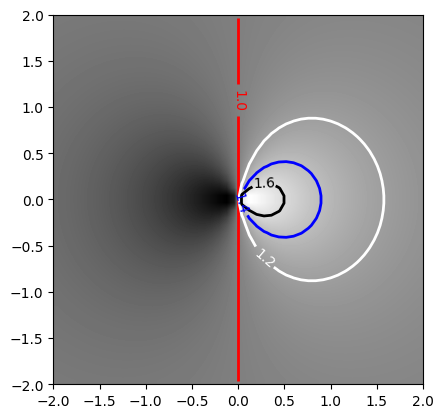

In [150]:
a = 1
b = 1

xs = np.linspace(-2, 2, 50)
ys = np.linspace(-2, 2, 50)

C = np.zeros((50, 50))

for i, x in enumerate(xs):
    for j, y in enumerate(ys):

        r, t = rec2pol(x,y)
        C[i,j] = morph4(r, t, a, b)

fig, ax = plt.subplots()
im = ax.imshow(C.T, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(-2, 2, -2, 2))
levels = np.arange(1, 1.6, 0.2)
CS = ax.contour(C.T, levels, origin='lower', cmap='flag', extend='both',
                linewidths=2, extent=(-2, 2, -2, 2))

ax.clabel(CS, inline=True, fontsize=10)

### Morphogen-threshold location

Let $\hat{c}$ be a concentration threshold level.

The polar location having such level is

\begin{align}
\hat{c} &= (1 + a \cos(\hat{\theta})) e^{-b \hat{r}}
\\
\hat{r} &= b \ln \left( \frac{1 + a \cos(\hat{\theta})}{\hat{c}} \right)
\end{align}

If $a \geq 1$ makes $\ln$ of 0 or negative.

Therefore, $a < 1$

In [151]:
def morph_loc(t, a, b, ct):
    r = b * np.log( (1 + a*np.cos(t))/ct )

    return r


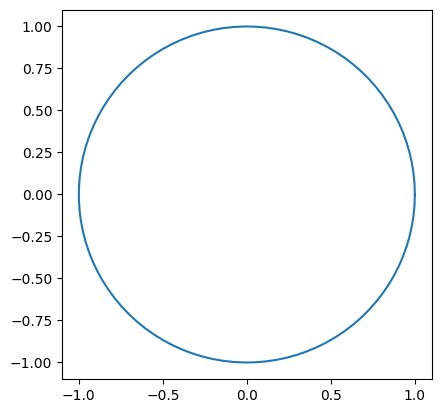

In [170]:
a = 0.5
b = 1
ct = 0.5

N = 100

ts = np.linspace(0, 2*np.pi, N)
# rs = morph_loc(ts, a, b, ct)
rs = np.sqrt(np.cos(ts)**2 + np.sin(ts)**2)

xs = np.zeros((N,))
ys = np.zeros((N,))

for i in range(N):
    x, y = pol2rec(rs[i], ts[i])
    xs[i] = x
    ys[i] = y

fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.set_aspect('equal', 'box')

In [171]:
def pol_sweep(ft, Res, tb=0, te=2*np.pi):
    '''
    Res: resolution
    '''

    ts = np.linspace(tb, te, Res)
    rs = ft(ts)

    xs = np.zeros((Res,))
    ys = np.zeros((Res,))

    for i in range(Res):
        x, y = pol2rec(rs[i], ts[i])
        xs[i] = x
        ys[i] = y

    return xs, ys

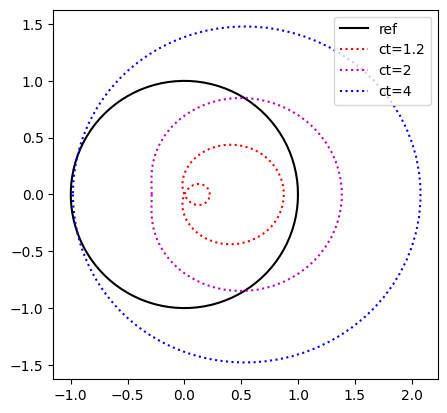

In [179]:
N = 100

f0 = lambda t : np.sqrt(np.cos(t)**2 + np.sin(t)**2)
f1 = lambda t : morph_loc(t, a=0.5, b=1, ct=1.2)
f2 = lambda t : morph_loc(t, a=0.5, b=1, ct=2)
f3 = lambda t : morph_loc(t, a=0.5, b=1, ct=4)

xs, ys = pol_sweep(f0, N)

x1s, y1s = pol_sweep(f1, N, 0, 2*np.pi)
x2s, y2s = pol_sweep(f2, N, 0, 2*np.pi)
x3s, y3s = pol_sweep(f3, N, 0, 2*np.pi)

fig, ax = plt.subplots()
ax.plot(xs, ys, 'k')
ax.plot(x1s, y1s, 'r:')
ax.plot(x2s, y2s, 'm:')
ax.plot(x3s, y3s, 'b:')

ax.set_aspect('equal', 'box')
ax.legend(['ref', 'ct=1.2', 'ct=2', 'ct=4'])

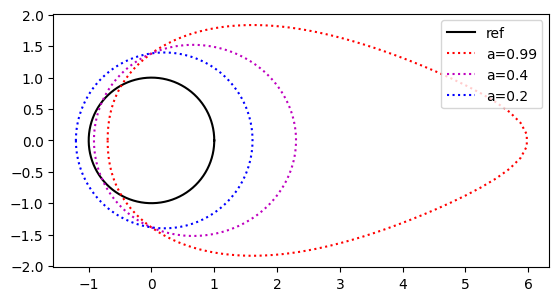

In [184]:
N = 200

f0 = lambda t : np.sqrt(np.cos(t)**2 + np.sin(t)**2)
f1 = lambda t : morph_loc(t, a=0.99, b=1, ct=4)
f2 = lambda t : morph_loc(t, a=0.6, b=1, ct=4)
f3 = lambda t : morph_loc(t, a=0.2, b=1, ct=4)

xs, ys = pol_sweep(f0, N)

x1s, y1s = pol_sweep(f1, N, 0, 2*np.pi)
x2s, y2s = pol_sweep(f2, N, 0, 2*np.pi)
x3s, y3s = pol_sweep(f3, N, 0, 2*np.pi)

fig, ax = plt.subplots()
ax.plot(xs, ys, 'k')
ax.plot(x1s, y1s, 'r:')
ax.plot(x2s, y2s, 'm:')
ax.plot(x3s, y3s, 'b:')

ax.set_aspect('equal', 'box')
ax.legend(['ref', 'a=0.99', 'a=0.4', 'a=0.2'])

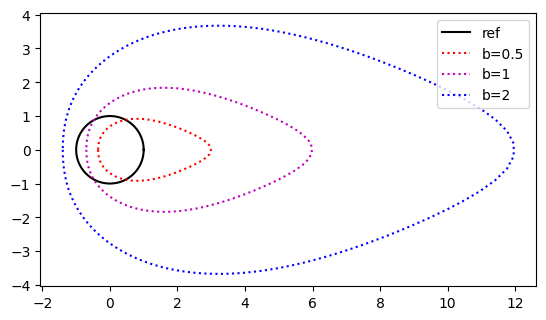

In [185]:
N = 200

f0 = lambda t : np.sqrt(np.cos(t)**2 + np.sin(t)**2)
f1 = lambda t : morph_loc(t, a=0.99, b=0.5, ct=4)
f2 = lambda t : morph_loc(t, a=0.99, b=1, ct=4)
f3 = lambda t : morph_loc(t, a=0.99, b=2, ct=4)

xs, ys = pol_sweep(f0, N)

x1s, y1s = pol_sweep(f1, N, 0, 2*np.pi)
x2s, y2s = pol_sweep(f2, N, 0, 2*np.pi)
x3s, y3s = pol_sweep(f3, N, 0, 2*np.pi)

fig, ax = plt.subplots()
ax.plot(xs, ys, 'k')
ax.plot(x1s, y1s, 'r:')
ax.plot(x2s, y2s, 'm:')
ax.plot(x3s, y3s, 'b:')

ax.set_aspect('equal', 'box')
ax.legend(['ref', 'b=0.5', 'b=1', 'b=2'])

It is very promising.

I may need a rationale backing on the $(1 + a \cos \theta)$ term.

* Also, it is a bit difficult to control.
  * Does it matter ? I'll resort to optimization. Mm...

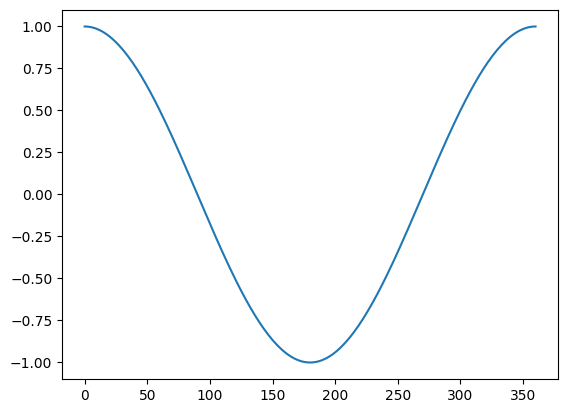

In [187]:
ts = np.linspace(0, 360, 200)
plt.plot(ts, np.cos(ts/180 * np.pi))

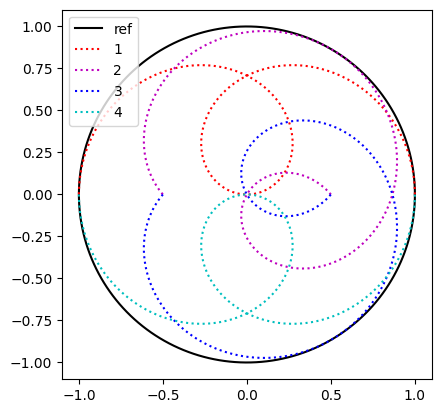

In [199]:
N = 200

f0 = lambda t : np.sqrt(np.cos(t)**2 + np.sin(t)**2)
f1 = lambda t : np.cos(0.5*t)
f2 = lambda t : np.cos(0.5*t + np.pi/3)
f3 = lambda t : np.cos(0.5*t + 2*np.pi/3)
f4 = lambda t : np.cos(0.5*t + np.pi)

xs, ys = pol_sweep(f0, N)

x1s, y1s = pol_sweep(f1, N, 0, 2*np.pi)
x2s, y2s = pol_sweep(f2, N, 0, 2*np.pi)
x3s, y3s = pol_sweep(f3, N, 0, 2*np.pi)
x4s, y4s = pol_sweep(f4, N, 0, 2*np.pi)


fig, ax = plt.subplots()
ax.plot(xs, ys, 'k')
ax.plot(x1s, y1s, 'r:')
ax.plot(x2s, y2s, 'm:')
ax.plot(x3s, y3s, 'b:')
ax.plot(x4s, y4s, 'c:')

ax.set_aspect('equal', 'box')
ax.legend(['ref', '1', '2', '3', '4'])

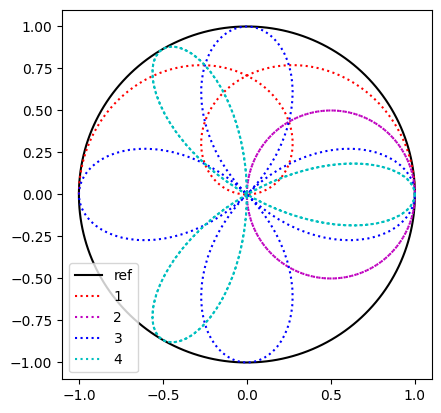

In [200]:
N = 200

f0 = lambda t : np.sqrt(np.cos(t)**2 + np.sin(t)**2)
f1 = lambda t : np.cos(0.5*t)
f2 = lambda t : np.cos(t)
f3 = lambda t : np.cos(2*t)
f4 = lambda t : np.cos(3*t)

xs, ys = pol_sweep(f0, N)

x1s, y1s = pol_sweep(f1, N, 0, 2*np.pi)
x2s, y2s = pol_sweep(f2, N, 0, 2*np.pi)
x3s, y3s = pol_sweep(f3, N, 0, 2*np.pi)
x4s, y4s = pol_sweep(f4, N, 0, 2*np.pi)


fig, ax = plt.subplots()
ax.plot(xs, ys, 'k')
ax.plot(x1s, y1s, 'r:')
ax.plot(x2s, y2s, 'm:')
ax.plot(x3s, y3s, 'b:')
ax.plot(x4s, y4s, 'c:')

ax.set_aspect('equal', 'box')
ax.legend(['ref', '1', '2', '3', '4'])

## Morphotron 5

* Steady state morphgen $c(x) = c_0 e^{-\frac{x}{\lambda}}$

* $x$ is a radial distance from the source center.

  Distance from the origin
  $r \equiv x$

* Extended to 2D, at initial-distance condition

  $c(r_0, \theta) = q(\theta)$

  where the initial distance is very close to $0$ (but not quite $0$):
  
  $r_0 \rightarrow 0$

* Then, the steady state morphgen $c(r, \theta) = c_0(\theta) e^{-\frac{r}{\lambda}}$ must satisfy

  * $c(r_0, \theta) = q(\theta)$


* Suppose $c_0(\theta)$ can be represented by Fourier series,

  $c_0(\theta) = \sum_{n=-\infty}^{\infty} A_n e^{-2 \pi n i \theta}$

Therefore,

$$c(r, \theta) = \sum_{n=-\infty}^{\infty} A_n e^{n i \theta} e^{- \frac{r}{\lambda}}$$

where $\lambda = \sqrt{\frac{D}{k}}$

* $A_n = \int_0^{2 \pi} q(\theta) e^{-n i \theta} d \theta$

  
  Approximate with

  $$A_n = \sum_{\theta=0}^{2 \pi} q(\theta) e^{-n i \theta} \Delta \theta$$

### Code ```morphPolar```

$$c(r, \theta) = \sum_{n=-\infty}^{\infty} A_n e^{n i \theta} e^{- \frac{r}{\lambda}}$$


In [207]:
def morphPolar(r, th, An, lda):
    '''
    r : distance from source center                        [np.array (R,)]
    th: direction                                          [np.array (Q,)]
    An: coeff: ..., A[-2], A[-1], A[0], A[1], A[2], ...    [np.array (N,)]
    lda : lambda = sqrt(D/k)
          * D:diffusion factor
          * k:degradation rate

    return c(r,th)                                         [np.array (R,Q)]
    '''
    r = r.reshape((-1,1))                            # R x 1
    th = th.reshape((-1,1))                          # Q x 1

    N = len(An)
    n = int( (N-1)/2 )
    nvec = np.arange(-n, n+1).reshape((-1,1))        # N x 1
    An = An.reshape((-1,1))                          # N x 1

    sth = np.exp(1j * np.dot(nvec, th.T))            # N x Q
    Aeth = np.dot(An.T, sth)                         # 1 x Q

    sr = np.exp(- r/lda )                            # R x 1

    c = np.dot(sr, Aeth)                             # R x Q

    return c

### Test

In [206]:
An.shape

(3,)

In [242]:
ths = np.linspace(0, 2*np.pi, 50)
rs = np.linspace(0, 4, 25)

An = np.array([0.5, 1, 0.5])

lda = 1e4

c = morphPolar(rs, ths, An, lda)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


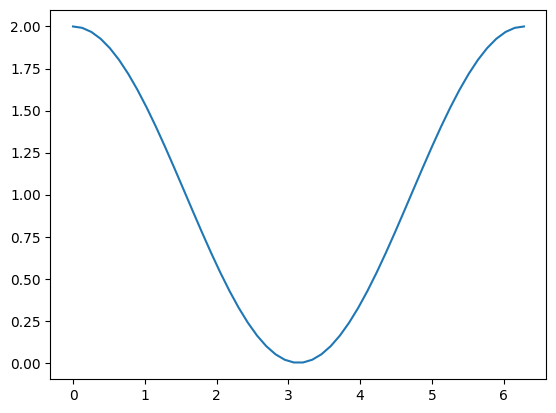

In [243]:
plt.plot(ths, c[0,:])

### Code ```morphPolarCoeff```

$$A_n = \sum_{\theta=0}^{2 \pi} q(\theta) e^{-n i \theta} \Delta \theta$$

In [214]:
def morphPolarCoeff(q, N, dth=0.01):
    '''
    Approximate fourier coefficients
    q: function with vectorization capability:
       * taking (Q x 1) and returning (Q x 1)

    return An: np.array shape (N,): A[-n], ..., A[-1], A[0], A[1], ..., A[n]
           n = (N-1)/2
    '''
    ths = np.linspace(0, 2*np.pi, int(1/dth) + 1).reshape((-1,1))   # Q x 1

    n = int( (N-1)/2 )
    nvec = np.arange(-n, n+1).reshape((-1,1))                      # N x 1

    qth = q(ths).reshape((-1,1))                                   # Q x 1

    Sel = np.exp(-1j * np.dot(nvec, ths.T)) * dth                  # N x Q

    An = np.dot(Sel, qth)                                          # N x 1

    return An.reshape((-1,))

### Test 1

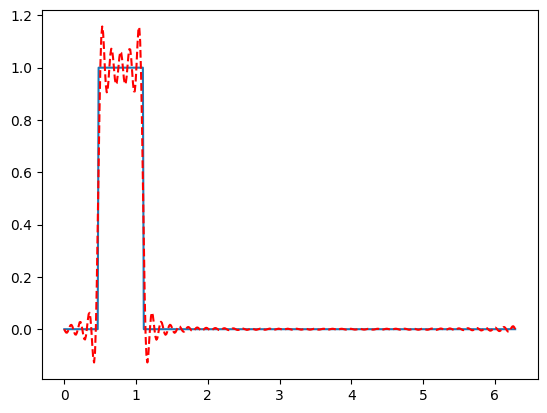

In [245]:
def q0(t):
    return (np.abs(t - np.pi/4) < np.pi/10)*1


ts = np.linspace(0, 2*np.pi, 500)


plt.plot(ts, q0(ts))

N = 100
An = morphPolarCoeff(q0, N, dth=0.01)

lda = 1e4
c0th = morphPolar(np.array([0]), ts, An, lda)

plt.plot(ts, c0th[0,:].real, 'r--')

In [251]:
rs = np.linspace(0, 4, 25)
lda = 1e1

cpolar = morphPolar(rs, ts, An, lda)



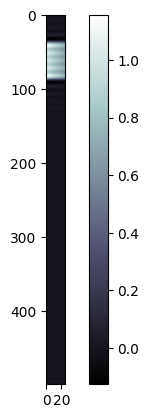

In [252]:
s= plt.imshow(cpolar.real.T, cmap=plt.cm.bone)
plt.colorbar(s, location="right");


In [240]:
cpolar.shape

(25, 500)

In [262]:
rs[::6]

array([0., 1., 2., 3., 4.])

In [257]:
rs

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
       1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
       2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
       3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ])

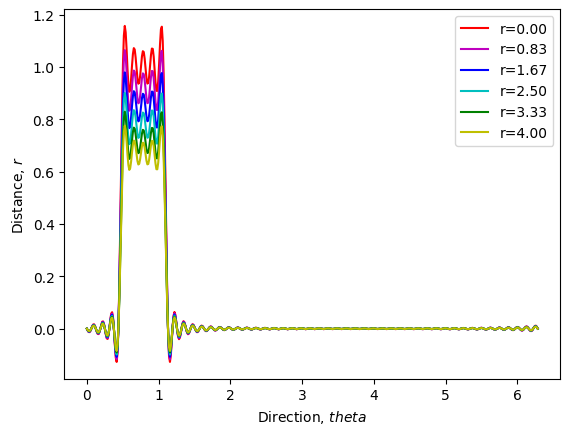

In [266]:
plt.plot(ts, cpolar[0,:].real, 'r')
plt.plot(ts, cpolar[5,:].real, 'm')
plt.plot(ts, cpolar[10,:].real, 'b')
plt.plot(ts, cpolar[15,:].real, 'c')
plt.plot(ts, cpolar[20,:].real, 'g')
plt.plot(ts, cpolar[24,:].real, 'y')
plt.xlabel('Direction, $theta$')
plt.ylabel('Distance, $r$')

plt.legend(['r={:.2f}'.format(rs[i]) for i in [0, 5, 10, 15, 20, 24]])



Note
1. It spreads further radially.
2. It does not disperse to neary direction.
   This is quite not natural.
   * But I'll leave it there.

### Test 2

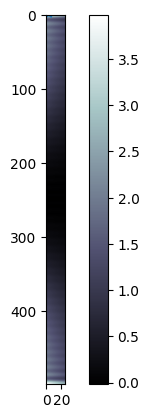

In [271]:
def q0(t):
    return np.cos(t) + 1


ts = np.linspace(0, 2*np.pi, 500)


plt.plot(ts, q0(ts))

N = 100
An = morphPolarCoeff(q0, N, dth=0.01)

rs = np.linspace(0, 4, 25)
lda = 1e1
cpolar = morphPolar(rs, ts, An, lda)


s= plt.imshow(cpolar.real.T, cmap=plt.cm.bone)
plt.colorbar(s, location="right");


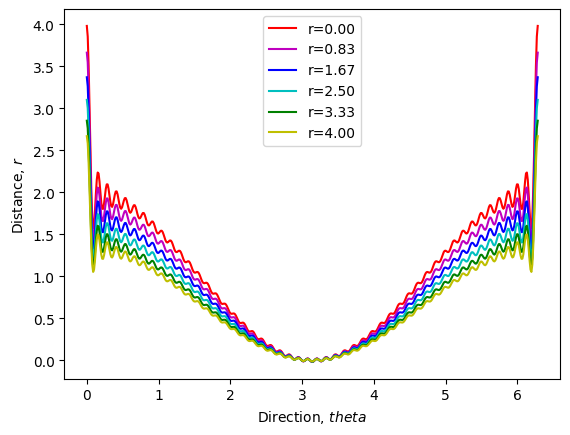

In [272]:
plt.plot(ts, cpolar[0,:].real, 'r')
plt.plot(ts, cpolar[5,:].real, 'm')
plt.plot(ts, cpolar[10,:].real, 'b')
plt.plot(ts, cpolar[15,:].real, 'c')
plt.plot(ts, cpolar[20,:].real, 'g')
plt.plot(ts, cpolar[24,:].real, 'y')
plt.xlabel('Direction, $theta$')
plt.ylabel('Distance, $r$')

plt.legend(['r={:.2f}'.format(rs[i]) for i in [0, 5, 10, 15, 20, 24]])



#### Polar to rectangular form

<ipython-input-273-27406916c496>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  C[i,j] = c[0,0]


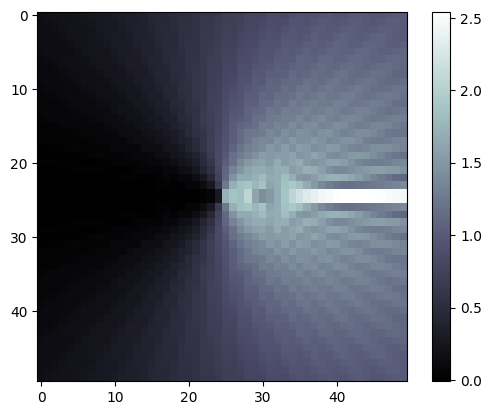

In [273]:
rs = np.linspace(0, 4, 25)
lda = 1e1

xs = np.linspace(-4, 4, 50)
ys = np.linspace(-4, 4, 50)

C = np.zeros((50, 50))

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        r, th = rec2pol(x, y)
        c = morphPolar(np.array([r]), np.array([th]), An, lda)
        C[i,j] = c[0,0]


s= plt.imshow(C.real.T, cmap=plt.cm.bone)
plt.colorbar(s, location="right");


It looks pretty.

But how to go from here to fitting the data?

# Appendix

## Recall 1D heat equation

Note that this is very similar to heat equation!

$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}$

* Boundary conditions
  at $x=0$ and $x=1$, then
  
  $\frac{\partial T}{\partial x}(0,t) = \frac{\partial T}{\partial x}(1,t) = 0$

* Initial condition

  $T(x, 0) = f(x)$

* Solution

$T(x, t) = \sum_{n=-\infty}^\infty c_n e^{2 n \pi i x} e^{- \alpha (2 n \pi)^2 t}$

where

* $c_k = \int_0^1 f(x) e^{-2 k \pi i x} dx$

  Approximate with

  $c_k = \sum_{x=0}^1 f(x) e^{-2 k \pi i x} \Delta x$

### Code: ```fourier_approx``` and ```fourier_coeff```

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def fourier_approx(x, N, cn):
    '''
    Approximate fourier series
    f(x) = \sum_{n=-N}^N c_n e^{2 n \pi i x}

    * cn must have 2*N + 1 elements
    * x: np.array shape (D,)
    '''

    x = x.reshape((-1,1))                            # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))        # M x 1, M = 2N + 1
    cn = cn.reshape((-1,1))                          # M x 1
    bases = np.exp(2*np.pi * 1j * np.dot(nvec, x.T)) # M x K

    f = np.dot(bases.T, cn)                          # K x 1

    return f.reshape((-1,))

In [ ]:
def fourier_coeff(f, N, dx=0.01):
    '''
    Approximate fourier coefficients
    f: function with vectorization capability:
       * taking (K x 1) and returning (K x 1)

    return cn: np.array shape (2*N+1,)
    '''
    xs = np.linspace(0, 1, int(1/dx) + 1).reshape((-1,1))   # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))               # M x 1

    fx = f(xs).reshape((-1,1))                              # K x 1

    Sel = np.exp(-2*np.pi* 1j * np.dot(nvec, xs.T)) * dx    # M x K

    cn = np.dot(Sel, fx)

    return cn.reshape((-1,))

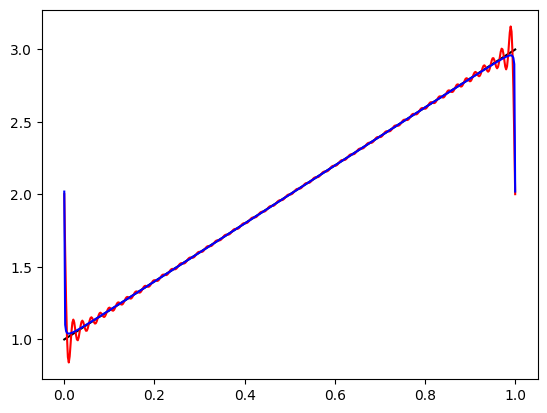

In [ ]:
N = 50
dx = 0.00001
f1 = lambda x: 2*x+1
# f1 = lambda x: np.sin(2*np.pi*x)

cn = fourier_coeff(f1, N, dx)

xs = np.linspace(0, 1, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xs, f1(xs), 'k')
plt.plot(xs, xf.real, 'r')

N = 500
cn = fourier_coeff(f1, N, dx)
xf = fourier_approx(xs, N, cn)
plt.plot(xs, xf.real, 'b')


### Code: ```soln_temp```

In [ ]:
def soln_temp(x, t, cn, alpha):
    '''
    Approximate T(x,t)
    T'(x,t) = \sum_{n=-N}^N c_n e^{2 n \pi i x} e^{-alpha (2 n \pi)^2 t}

    * cn must have 2*N + 1 elements
    * x: np.array shape (D,)
    * t: np.array shape (K,)

    return T' : np.array shape (D, K)
    '''

    x = np.array(x).reshape((-1,1))                                  # D x 1
    t = np.array(t).reshape((-1,1))                                  # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))              # M x 1

    cn = cn.reshape((-1,1))                                # M x 1
    ex = np.exp(2*np.pi * 1j * np.dot(nvec, x.T))          # M x D
    et = np.exp(-alpha*4*np.pi**2 * np.dot(nvec**2, t.T))  # M x K

    cex = cn * ex                                          # M x D, Broadcast

    Tp = np.dot(cex.T, et)                                 # D x K

    return Tp

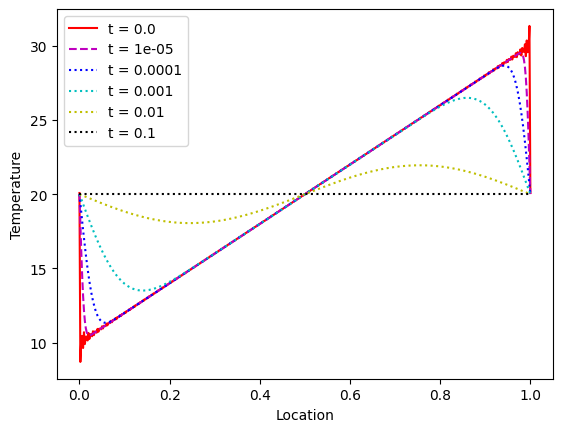

In [ ]:
# Test Temperature

N = 200
dx = 0.00001
Tx0 = lambda x: 10 + 20*x

cn = fourier_coeff(Tx0, N, dx)
# print('cn =', cn)

xs = np.linspace(0, 1, 500)
ts = np.array([0, 0.00001, 0.0001, 0.001, 0.01, 0.1])

a = 3 # Guess, just to test Temperature function
Tmat = soln_temp(xs, ts, cn, a)

plt.plot(xs, Tmat[:,0].real, 'r')
plt.plot(xs, Tmat[:,1].real, 'm--')
plt.plot(xs, Tmat[:,2].real, 'b:')
plt.plot(xs, Tmat[:,3].real, 'c:')
plt.plot(xs, Tmat[:,4].real, 'y:')
plt.plot(xs, Tmat[:,5].real, 'k:')

plt.xlabel('Location')
plt.ylabel('Temperature')
plt.legend(['t = {}'.format(t) for t in ts])

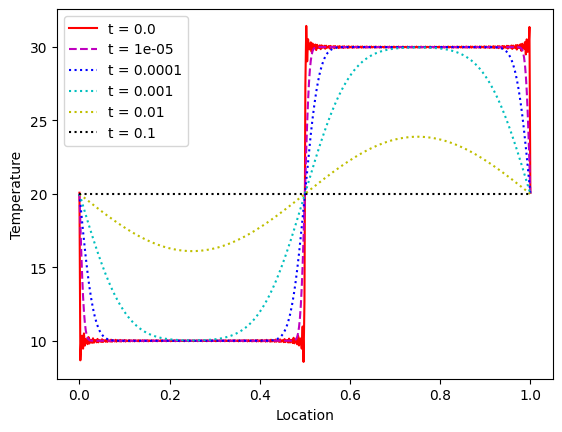

In [ ]:
# Test Temperature

N = 200
dx = 0.00001

def Tx0(x):

    return (x > 0.5)*30 + (x <= 0.5)*10

cn = fourier_coeff(Tx0, N, dx)
# print('cn =', cn)

xs = np.linspace(0, 1, 500)
ts = np.array([0, 0.00001, 0.0001, 0.001, 0.01, 0.1])

a = 3 # Guess, just to test Temperature function
Tmat = soln_temp(xs, ts, cn, a)

plt.plot(xs, Tmat[:,0].real, 'r')
plt.plot(xs, Tmat[:,1].real, 'm--')
plt.plot(xs, Tmat[:,2].real, 'b:')
plt.plot(xs, Tmat[:,3].real, 'c:')
plt.plot(xs, Tmat[:,4].real, 'y:')
plt.plot(xs, Tmat[:,5].real, 'k:')

plt.xlabel('Location')
plt.ylabel('Temperature')
plt.legend(['t = {}'.format(t) for t in ts])

## PDE: Separation of Variables

To solve PDE, assume if we can break PDE into multiple ODEs by separation of variables.

That is, assuming solution $u(x, y)$ can be factored into $u(x,y) = G(x) H(y)$.

Note: this does not always work.

### Example Laplace equation

Laplace equation

$$\nabla^2 \mathbf{u} = 0$$

or

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$

We can see Laplace equation as a 2D steady-state heat equation ($\frac{\partial u}{\partial t} \approx 0$).

Boundary conditions

* $u(0,y) = 0$
* $u(x,1) = 0$
* $u(1,y) = f(y)$
* $u(x,0) = 0$


Note
For all boundary conditions: $u(0,y) \neq 0$, $u(x,1) \neq 0$, $u(1,y) \neq 0$, and $u(x,0) \neq 0$,
we can work for 1 non-zero boundary condition at a time and superposition the results later.


Assume $u(x,y) = G(x) H(y)$

Then, substitute

\begin{align}
H(y) \frac{\partial^2 G(x)}{\partial x^2} + G(x) \frac{\partial^2 H(y)}{\partial y^2}
&= 0
\\
\frac{1}{G}\frac{\partial^2 G}{\partial x^2}
&= -\frac{1}{H}\frac{\partial^2 H}{\partial y^2}
\end{align}

Since $H$ is a function of $y$ while $G$ is a function of $x$,
the only possibility that LHS = RHS at every $y$ and every $x$ is that both have to equal the same constant, named $\lambda$.


* $\frac{1}{G}\frac{\partial^2 G}{\partial x^2} = \lambda$
* $-\frac{1}{H}\frac{\partial^2 H}{\partial y^2} = \lambda$


That is, we have 2 ODEs:

* $\ddot{G} - \lambda G = 0$

* $\ddot{H} + \lambda H = 0$

With transformed boundary conditions

* $u(0,y) = 0$ $\Rightarrow G(0) = 0$
* $u(x,1) = 0$ $\Rightarrow H(1) = 0$
* $u(1,y) = f(y)$
* $u(x,0) = 0$ $\Rightarrow H(0) = 0$


Work the easier set first: $H(0) = H(1) = 0$

* $H(y) = e^{a y}$
* $\dot{H}(y) = a e^{a y}$
* $\ddot{H}(y) = a^2 e^{a y}$

Hence,

$(a^2 + \lambda) e^{a y} = 0$

That is,

$a = \pm \sqrt{-\lambda}$

Consider a value of $\lambda$

* $\lambda < 0$
  * $H(y) = c_1 e^{\sqrt{-\lambda} y} + c_2 e^{-\sqrt{-\lambda} y}$
  * $H(0) = 0 = c_1 + c_2$ $\Rightarrow c_2 = -c_1$
  * $H(1) = 0 = c_1 e^{\sqrt{-\lambda}} + c_2 e^{-\sqrt{-\lambda}}$
    * $c_1 e^{\sqrt{-\lambda}} -c_1 e^{-\sqrt{-\lambda}} = 0$
    * $c_1 (e^{\sqrt{-\lambda}} - e^{-\sqrt{-\lambda}}) = 0$
      It is either
      * $c_1 = 0$ $\Rightarrow H(y) = 0$ (Trivial! We are not interested.)

* $\lambda = 0$
  * $H(y) = c_ 1 + c_2$ (constant! We are not interested.)

* $\lambda > 0$
  * $H(y) = c_1 e^{i \sqrt{\lambda} y} + c_2 e^{-i \sqrt{\lambda} y}$
  * $H(y) = (c_1 + c_2) \cos(\sqrt{\lambda} y) + i (c_1 - c_2) \sin(\sqrt{\lambda} y) $
  * $H(0) = 0$
    * $c_1 + c_2 = 0$ $\Rightarrow c_2 = -c_1$
    * $H(y) = 2 i c_1 \sin(\sqrt{\lambda} y)$
  * $H(1) = 0$
    * $2 i c_1 \sin(\sqrt{\lambda} y) = 0$
      It is either
      * $c_1 = 0$ (Trivial!)
      * Or $\sqrt{\lambda} = n \pi$ for $n = 1, 2, \ldots$

Hence, $H(y) = 2 i c_1 \sin(n \pi y)$

and $2 i c_1$ is just an known coefficient ($A \equiv 2 i c_1$), thus the basic solution

$$H(y) = \sin(n \pi y)$$

and $\lambda = (n \pi)^2$ .

Back to $G(x)$ (with $G(0) = 0$)

* $G(x) = e^{b x}$
* $\dot{G}(x) = b e^{b x}$
* $\ddot{G}(x) = b^2 e^{b x}$

Hence, with $\lambda = (n \pi)^2$ for $n = 1, 2, \ldots$

\begin{align}
\ddot{G} - (n \pi)^2 G &= 0
\\
\left(b^2 - (n \pi)^2\right) e^{b x} & = 0
\end{align}

$b = \pm n \pi$

Therefore,

$G(x) = c_1 e^{n \pi x} + c_2 e^{-n \pi x}$

for $n = 1, 2, 3, \ldots$

With $G(0) = 0$,

* $0 = c_1 + c_2$ $\Rightarrow c_2 = -c_1$

Therefore, the basic solution

\begin{align}
G(x) = e^{n \pi x} - e^{-n \pi x}
\end{align}


for $n = 1, 2, \ldots$

Finally, we have the basic solution:
* $u(x,y) = (e^{n \pi x} - e^{-n \pi x}) \sin(n \pi y)$

Recall $\sinh(x) = \frac{e^x - e^{-x}}{2}$
* $u(x,y) = 2 \sinh(n \pi x) \sin(n \pi y)$


General solution:
$$u(x, y) = \sum_{n=1}^\infty A_n \sinh(n \pi x) \cdot \sin(n \pi y) $$

Note the $2$ is absorbed into an undetermined coefficient $A_n$.

The challenge here is to find $A_n$

* $x \in [0, 1]$ and $y \in [0, 1]$

##### Easy boundary function

Make it easier by selecting an easier boundary function $f(y)$

E.g.,

$u(1, y) = f(y) = 500 \sin(2 \pi y)$

Thus,
\begin{align}
500 \sin(2 \pi y) = \sum_{n=-\infty}^\infty A_n \sinh(n \pi) \cdot \sin(n \pi y)
\end{align}

* $A_2 = 500/\sinh(2 \pi)$
* $A_n = 0$ for $n \neq 2$

$$u(x, y) = \frac{500}{\sinh(2 \pi)} \sinh(2 \pi x) \sin(2 \pi y)$$

In [ ]:
def LaplaceU(x, y):
    pi2 = np.pi * 2

    uval = 500/np.sinh(pi2) * np.sinh(pi2*x) * np.sin(pi2*y)

    return uval

In [ ]:
R = 21

xs = np.linspace(0, 1, R)
ys = np.linspace(0, 1, R)

xv, yv = np.meshgrid(xs, ys)

U = np.zeros((R, R))

for i in range(R):
  for j in range(R):
    U[i,j] = LaplaceU(xv[i,j], yv[i,j])

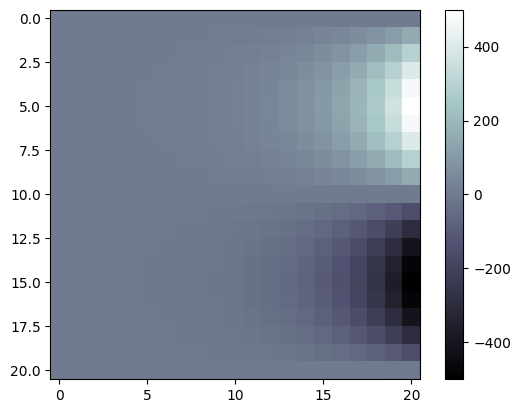

In [ ]:
s= plt.imshow(U, cmap=plt.cm.bone)
plt.colorbar(s)

It looks correct!

Three boundaries are 0.
One is sine-like.

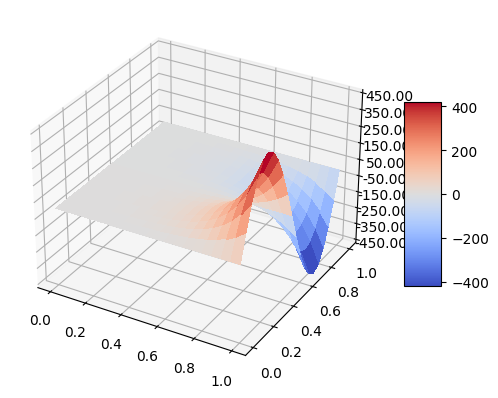

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = xv
Y = yv
Z = U

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-450, 450)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'U[:,-1]')

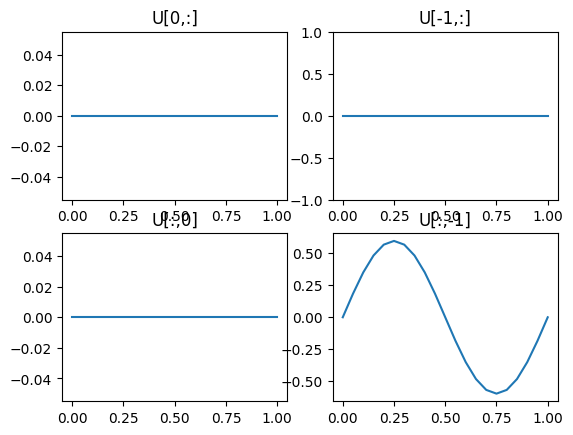

In [ ]:
# Check boundary conditions

plt.subplot(2,2,1)
plt.plot(xs, U[0, :])
plt.title('U[0,:]')

plt.subplot(2,2,2)
plt.plot(xs, U[-1, :])
plt.title('U[-1,:]')
plt.ylim((-1,1))  # There is some numerical error, np.sin(2 * np.pi) != 0. So I keep it look clean.

plt.subplot(2,2,3)
plt.plot(ys, U[:, 0])
plt.title('U[:,0]')

plt.subplot(2,2,4)
plt.plot(ys, U[:, 1])
plt.title('U[:,-1]')

The boundary conditions:

* $u(0,y) = 0$ so ```U[:,0]``` should be flat. Correct!
* $u(x,1) = 0$ so ```U[-1,:]``` should be flat. Correct!
* $u(1,y) = f(y)$ so ```U[:,-1]``` should be sine-like. Correct!
* $u(x,0) = 0$ so ```U[0,:]``` should be flat. Correct!


$$u(x, y) = \frac{500}{\sinh(2 \pi)} \sinh(2 \pi x) \sin(2 \pi y)$$

* $u_{xx} + u_{yy} = 0$
  * Agree!
* $u(x, 1) = \frac{500}{\sinh(2 \pi)} \sinh(2 \pi x) \sin(2 \pi) = 0$
  * Agree!



##### General boundary function

Recall the solution

$$u(x, y) = \sum_{n=1}^\infty A_n \sinh(n \pi x) \cdot \sin(n \pi y) $$

To determine the values of coefficients $A_n$'s,
we use the Fourier coefficient trick.

Keys
* Linearity
* Orthogonality

  E.g.,

  \begin{align}
  f(y) &= C_1 \sin(\pi y) + C_2 \sin(2 \pi y) + C_3 \sin(3 \pi y) + \cdots
  \\
  &= \sum_{n=1}^{\infty} C_n \sin(n \pi y)
  \end{align}

Let see
  $\int_0^1 f(y) \sin(\pi y) dy = \int_0^1 \left( C_1 \sin(\pi y) \sin(\pi y) + C_2 \sin(2 \pi y) \sin(\pi y) + C_3 \sin(3 \pi y) \sin(\pi y) + \cdots \right) dy$

> Recall Product-to-sum identities
> $\sin \theta \sin \phi = \frac{\cos(\theta - \phi) - \cos(\theta + \phi)}{2}$

Hence,

\begin{align}
\int_0^1 f(y) \sin(\pi y) dy &=
\int_0^1 C_1 (\frac{\cos(0)}{2} - \frac{\cos(2 \pi y)}{2}) dy + \int_0^1 C_2 (\frac{\cos(\pi y)}{2} - \frac{\cos(3 \pi y)}{2}) dy + \cdots
\\
&= \frac{C_1}{2} y\bigm\vert_0^1 - 0 + 0 - 0 + \cdots
\\
&= \frac{C_1}{2}
\end{align}

Note $\int_{0}^{\pi} \cos(\theta) d \theta = 0$

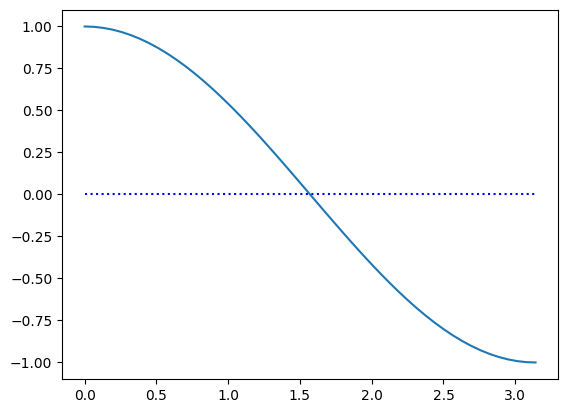

In [ ]:
xs = np.linspace(0, np.pi, 50)
plt.plot(xs, np.cos(xs))
plt.plot([0, np.pi], [0, 0], 'b:')

Similarly,

\begin{align}
\int_0^1 f(y) \sin(k \pi y) dy &=
\ldots + \int_0^1 C_{k-1} (\frac{\cos(-\pi y)}{2} - \frac{\cos((2k -1) \pi y)}{2}) dy + \int_0^1 C_k (\frac{\cos(0)}{2} - \frac{\cos(2 k \pi y)}{2}) dy + \cdots
\\
&= \cdots + 0 - 0 + \frac{C_k}{2} y\bigm\vert_0^1 - 0 + \cdots
\\
&= \frac{C_k}{2}
\end{align}

$$C_k = 2 \int_0^1 f(y) \sin(k \pi y) dy $$

The boundary function

$$u(1,y) = f(y) = \sum_{n=1}^\infty A_n \sinh(n \pi) \cdot \sin(n \pi y)$$

Let $C_n \equiv A_n \sinh(n \pi)$

That is,

$$A_n = \frac{2}{\sinh(n \pi)} \int_0^1 f(y) \sin(n \pi y) dy $$

###### Discretize

Approximate with

$$A_n = \frac{2}{\sinh(n \pi)} \sum_{y=0}^1 f(y) \sin(n \pi y) \Delta y $$

###### Code: Laplace ```LAn```


In [ ]:
def LAn(f, N, dy=0.01):
    '''
    Approximate coefficients of the Laplace solution
    f: function with vectorization capability:
       * taking (K x 1) and returning (K x 1)
       * K is a number of y's
    N: a number of An: A1, A2, ..., AN
    dy

    return An: np.array shape (N+1,)
    '''
    ys = np.linspace(0, 1, int(1/dy) + 1).reshape((-1,1))   # K x 1
    nvec = np.arange(1, N+1).reshape((-1,1))                # N x 1

    fy = f(ys).reshape((-1,1))                              # K x 1

    Sel = np.sin(np.pi* np.dot(nvec,ys.T)) * dy             # N x K

    cn = 2 * np.dot(Sel, fy)                                # N x 1
    denom = np.sinh(np.pi* nvec)                            # N x 1
    An = cn/denom

    return An.reshape((-1,))

In [ ]:
def u1y(y, An):
    '''
    y: np.array (K,)
    An: np.array (N,)

    return u(1,y) : (K,)
    '''

    ys = y.reshape((-1,1))                                  # K x 1

    An = An.reshape((-1,1))
    N, _ = An.shape                                         # N x 1
    nvec = np.arange(1, N+1).reshape((-1,1))                # N x 1

    s0 = np.sinh(np.pi* nvec)                               # N x 1
    cn = An*s0                                              # N x 1

    s1 = np.sin(np.pi* np.dot(nvec,ys.T))                   # N x K
    uy = np.dot(s1.T, cn)                                   # K x 1

    return uy.reshape((-1,))


[-4.34608637e-16  1.86744924e+00  4.34149891e-18 -1.95927358e-19
 -1.32595178e-20]


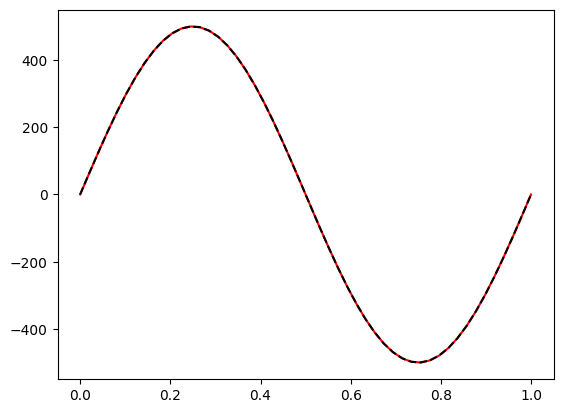

In [ ]:
# Test

fy0 = lambda y: 500*np.sin(2*np.pi*y)

An = LAn(fy0, N=5, dy=0.01)
print(An)

ys = np.linspace(0, 1, 50)
plt.plot(ys, fy0(ys), 'r')

us = u1y(ys, An)
plt.plot(ys, us, 'k--')

[-2.44325896e-16  1.86744924e+00  1.43187416e-18 -1.63521270e-19
  7.53508638e-05 -6.26183098e-22  2.58940090e-23]


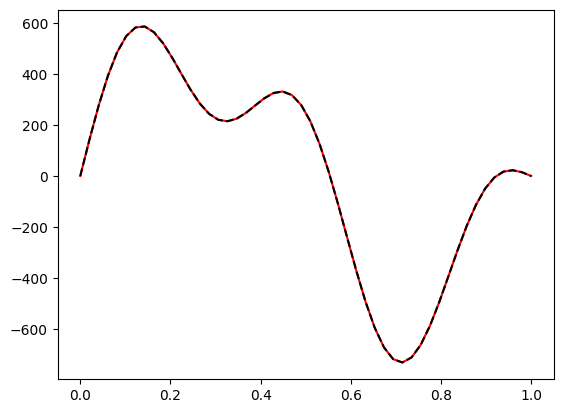

In [ ]:
# Test

fy0 = lambda y: 500*np.sin(2*np.pi*y) + 250*np.sin(5*np.pi*y)

An = LAn(fy0, N=7, dy=0.01)
print(An)

ys = np.linspace(0, 1, 50)
plt.plot(ys, fy0(ys), 'r')

us = u1y(ys, An)
plt.plot(ys, us, 'k--')

[ 5.51200778e-02 -1.18846397e-03  3.42245830e-05 -1.10859439e-06
  3.82969401e-08 -1.37788248e-09  5.09826496e-11 -1.92537268e-12
  7.38539271e-14 -2.86783356e-15  1.12467008e-16 -4.44657862e-18
  1.77002000e-19 -7.08650434e-21  2.85122146e-22 -1.15209190e-23
  4.67266912e-25 -1.90138184e-26  7.75954454e-28 -3.17487682e-29
  1.30203478e-30 -5.35082794e-32  2.20309464e-33 -9.08617878e-35
  3.75315789e-36 -1.55245535e-37  6.42974922e-39 -2.66607971e-40
  1.10665634e-41 -4.59804799e-43  1.91213881e-44 -7.95825333e-46
  3.31465605e-47 -1.38150944e-48  5.76153621e-50 -2.40418555e-51
  1.00373877e-52 -4.19252468e-54  1.75191556e-55 -7.32343449e-57
  3.06240722e-58 -1.28097547e-59  5.35959981e-61 -2.24296310e-62
  9.38847755e-64 -3.93040206e-65  1.64563451e-66 -6.89081373e-68
  2.88559028e-69 -1.20840442e-70]


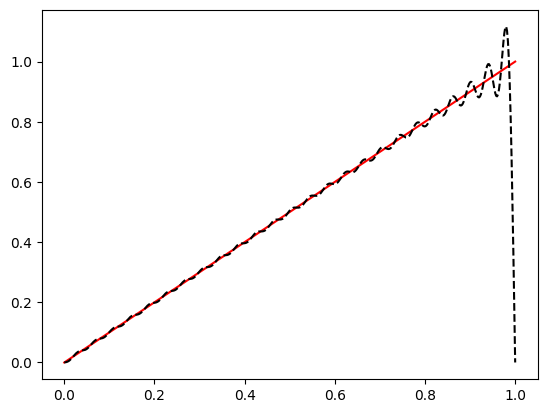

In [ ]:
# Test

fy0 = lambda y: y

N = 50
An = LAn(fy0, N, dy=0.01)
print(An)

ys = np.linspace(0, 1, 500)
plt.plot(ys, fy0(ys), 'r')

us = u1y(ys, An)
plt.plot(ys, us, 'k--')

###### Code: Laplace ```Lsoln```

$$u(x, y) = \sum_{n=1}^\infty A_n \sinh(n \pi x) \cdot \sin(n \pi y) $$


In [ ]:
def Lsoln(x, y, An):
    '''
    x : np.array (K,)
    y : np.array (L,)
    An: np.array (N,)

    return u(x,y) : (K,L)
    '''
    xs = x.reshape((-1,1))                                  # K x 1
    ys = y.reshape((-1,1))                                  # L x 1
    An = An.reshape((-1,1))
    N, _ = An.shape                                         # N x 1
    nvec = np.arange(1, N+1).reshape((-1,1))                # N x 1

    s0 = np.sinh(np.pi* np.dot(nvec,xs.T))                  # N x K
    s1 = np.sin(np.pi* np.dot(nvec,ys.T))                   # N x L
    c  = An * s0                                            # N x K
    uxy = np.dot(c.T, s1)                                   # K x L

    return uxy


###### Test 1

In [ ]:
Rx, Ry = 21, 21

xs = np.linspace(0, 1, Rx)
ys = np.linspace(0, 1, Ry)

fy0 = lambda y: 500*np.sin(2*np.pi*y)

An = LAn(fy0, N=5, dy=0.01)

U = Lsoln(xs, ys, An)


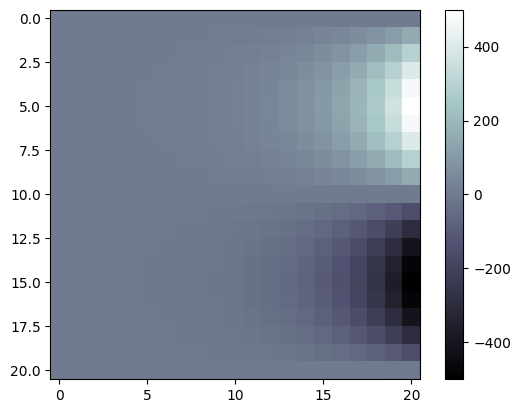

In [ ]:
s= plt.imshow(U.T, cmap=plt.cm.bone)
plt.colorbar(s)

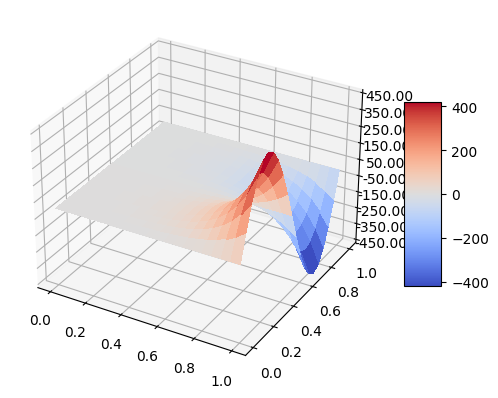

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xv, yv = np.meshgrid(xs, ys)
X = xv
Y = yv
Z = U.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-450, 450)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'U[:,-1]')

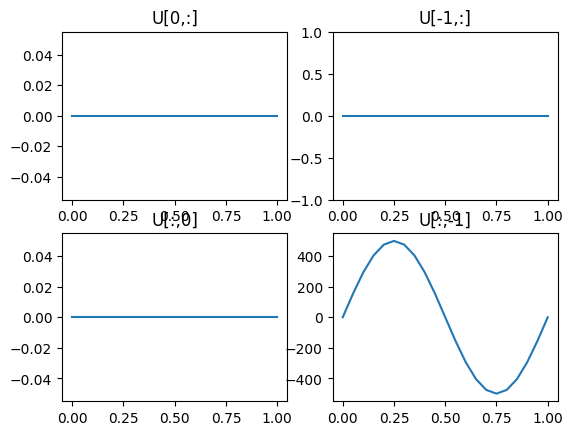

In [ ]:
# Check boundary conditions

plt.subplot(2,2,1)
plt.plot(xs, U.T[0, :])
plt.title('U[0,:]')

plt.subplot(2,2,2)
plt.plot(xs, U.T[-1, :])
plt.title('U[-1,:]')
plt.ylim((-1,1))  # There is some numerical error, np.sin(2 * np.pi) != 0. So I keep it look clean.

plt.subplot(2,2,3)
plt.plot(ys, U.T[:, 0])
plt.title('U[:,0]')

plt.subplot(2,2,4)
plt.plot(ys, U.T[:, -1])
plt.title('U[:,-1]')

###### Test 2

In [ ]:
Rx, Ry = 21, 21

xs = np.linspace(0, 1, Rx)
ys = np.linspace(0, 1, Ry)

# fy0 = lambda y: 5*np.sin(2 * np.pi* y) + 1*np.sin(5 * np.pi * y)
fy0 = lambda y: y

An = LAn(fy0, N=50, dy=0.01)

U = Lsoln(xs, ys, An)

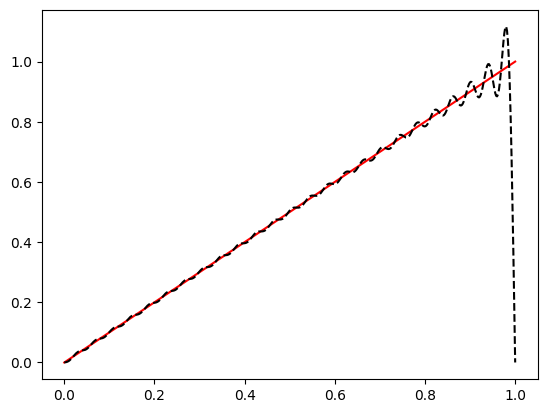

In [ ]:
yys = np.linspace(0, 1, 500)
plt.plot(yys, fy0(yys), 'r')

us = u1y(yys, An)
plt.plot(yys, us, 'k--')

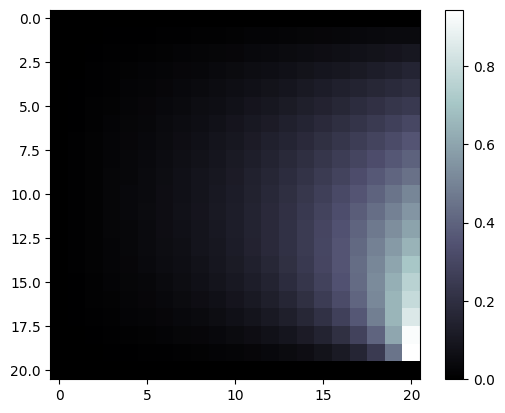

In [ ]:
s= plt.imshow(U.T, cmap=plt.cm.bone)
plt.colorbar(s)

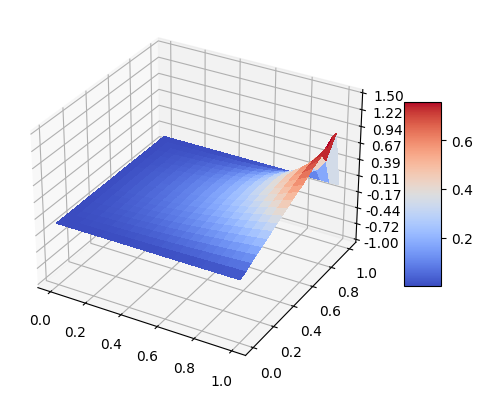

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xv, yv = np.meshgrid(xs, ys)
X = xv
Y = yv
Z = U.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1, 1.5)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'U[:,-1]')

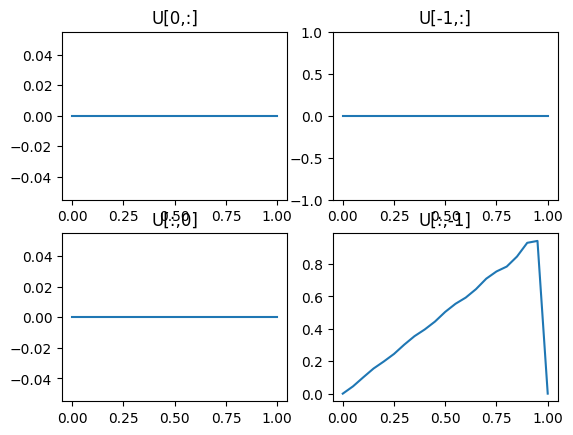

In [ ]:
# Check boundary conditions

plt.subplot(2,2,1)
plt.plot(xs, Z[0, :])
plt.title('U[0,:]')

plt.subplot(2,2,2)
plt.plot(xs, Z[-1, :])
plt.title('U[-1,:]')
plt.ylim((-1,1))  # There is some numerical error, np.sin(2 * np.pi) != 0. So I keep it look clean.

plt.subplot(2,2,3)
plt.plot(ys, Z[:, 0])
plt.title('U[:,0]')

plt.subplot(2,2,4)
plt.plot(ys, Z[:, -1])
plt.title('U[:,-1]')

## Trigonometry identities

Product-to-sum

* $\cos(\theta) \cos(\phi) = \frac{\cos(\theta - \phi) + \cos(\theta + \phi)}{2}$

* $\sin(\theta) \sin(\phi) = \frac{\cos(\theta - \phi) - \cos(\theta + \phi)}{2}$

* $\sin(\theta) \cos(\phi) = \frac{\sin(\theta + \phi) - \sin(\theta - \phi)}{2}$






## Fourier series

* $f(x) = \sum_{n=0}^\infty a_n \cos(n x) + \sum_{n=1}^\infty b_n \sin(n x)$
* $f(x) = \sum_{n=-\infty}^{\infty} c_n e^{i n x}$

* $a_0 = \frac{1}{2 \pi} \int_{-\pi}^\pi f(x) dx$
* $a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \cos(n x) dx$
* $b_n = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \sin(n x) dx$


* $c_n = \frac{1}{2 \pi} \int_{-\pi}^\pi f(x) e^{-i n x} dx$

### Example 1D heat equation

$$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}$$

Assume $T(x, t) = G(x) H(t)$.

Then, substitute

\begin{align}
G(x) \frac{\partial H(t)}{\partial t} &= \alpha H(t) \frac{\partial^2 G(x)}{\partial x^2}
\\
\frac{1}{H}\frac{\partial H}{\partial t}
&=
\frac{\alpha}{G}\frac{\partial^2 G}{\partial x^2}
\end{align}

Since $H$ is a function of $t$ while $G$ is a function of $x$,
the only possibility that LHS = RHS at every $t$ and every $x$ is that both equal a constant, named $\lambda$.

* $\frac{1}{H}\frac{\partial H}{\partial t} = \lambda$

* $\frac{\alpha}{G}\frac{\partial^2 G}{\partial x^2} = \lambda$


* $H = e^{a t}$
* $\dot{H} = a e^{a t}$

Hence,
* $a e^{a t} = \lambda e^{a t}$
* $a = \lambda$

A solution
$$H = e^{\lambda t}$$

* $G = e^{b x}$
* $\dot{G} = b e^{b x}$
* $\ddot{G} = b^2 e^{b x}$

Hence,
* $b^2 e^{b x} = \frac{\lambda}{\alpha} e^{b x}$
* $b = \pm \sqrt{\frac{\lambda}{\alpha}}$

A solution

$$G = c_1 e^{\sqrt{\frac{\lambda}{\alpha}} x} + c_2 e^{-\sqrt{\frac{\lambda}{\alpha}} x}$$

To continue, we need to work on the initial and boundary conditions.

# End